## Analytics Olympiad 2022

### Problem Description
---
The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and the claims which should be accepted for reimbursement. 

You are given a rich dataset consisting of thousands of rows of past records, which you can use to learn more about your customers’ behaviours. For example, you are supposed to create an ML model to look at a case of an insurance claim and decide whether to reject or accept it. 


### Importing Required Libraries
---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
plt.style.use("seaborn-darkgrid")

### Data loading 
---

In [3]:
#importing train data
original_train_df = pd.read_csv('train.csv')
original_train_df

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,0.0,0.0,31885,9000.0,2,0,0,0.0,SUV
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,1.0,0.0,32277,10000.0,0,0,0,1.0,Sedan
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,1.0,0.0,34800,11000.0,0,0,0,1.0,Sedan
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,0.0,HatchBack


In [4]:
#importing test data
original_test_df = pd.read_csv('test.csv')
original_test_df

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,352928,40-64,male,10-19y,none,working class,0.814707,1.0,after 2015,0.0,1.0,10238,10000.0,0,0,0,HatchBack
1,38579,26-39,female,20-29y,high school,upper class,0.344051,1.0,before 2015,0.0,0.0,34073,13000.0,0,0,0,Sedan
2,504022,40-64,male,10-19y,none,upper class,0.620691,0.0,after 2015,1.0,0.0,10238,12000.0,0,0,0,SUV
3,202404,26-39,male,20-29y,high school,upper class,0.689658,1.0,after 2015,1.0,1.0,10238,16000.0,1,0,0,SUV
4,527913,65+,male,10-19y,none,middle class,0.755666,0.0,after 2015,0.0,1.0,92101,14000.0,2,0,0,HatchBack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,117683,65+,female,20-29y,high school,poverty,0.472022,1.0,before 2015,1.0,0.0,10238,10000.0,0,0,1,Sports Car
44996,619620,40-64,male,20-29y,university,working class,0.757312,0.0,before 2015,1.0,0.0,10238,12000.0,0,0,0,Sports Car
44997,11086,40-64,male,10-19y,none,poverty,0.566764,0.0,after 2015,0.0,0.0,10238,13000.0,0,0,0,Sedan
44998,31717,65+,male,30y+,high school,upper class,0.741850,1.0,before 2015,1.0,0.0,92101,13000.0,1,0,0,Sports Car


In [5]:
#checking count, min, max and quantiles of numerical features
original_train_df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,394931.295905,0.602173,0.827038,0.584143,0.520000,18045.439267,11061.228571,0.675676,0.129733,0.549314,0.422648
std,279694.106053,0.138045,0.378216,0.492871,0.499602,16709.040449,2972.355482,1.383678,0.589714,1.402809,0.493983
min,101.000000,0.066880,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,156351.750000,0.514876,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
50%,354679.500000,0.601112,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000
75%,598602.250000,0.703216,1.000000,1.000000,1.000000,22957.750000,13000.000000,1.000000,0.000000,0.000000,1.000000
max,999976.000000,0.954075,1.000000,1.000000,1.000000,92101.000000,21000.000000,20.000000,6.000000,15.000000,1.000000


In [6]:
#checking data types of columns
original_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [7]:
#assigning original dataframe to another variable for performing various calculations.
df_train = original_train_df.copy()
df_test = original_test_df.copy()
print(df_train.shape)
print(df_test.shape)

(105000, 18)
(45000, 17)


### Data Imbalance
---

In [8]:
#checking data imbalance in target variable
round((df_train.OUTCOME.value_counts(normalize=True))*100,2)

0.0    57.74
1.0    42.26
Name: OUTCOME, dtype: float64

### Data Cleaning
---

In [9]:
#Checking null values in train data
df_train.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

In [10]:
#Checking null values in test data
df_test.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
TYPE_OF_VEHICLE        0
dtype: int64

In [11]:
#Checking Duplicate rows in the data
df_train[df_train.duplicated()]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE


There are no null values and duplicates in the data

In [12]:
#droping ID columns it is just unique number for every entry in data
df_train1 = df_train.drop('ID', axis=1)

In [13]:
for i in df_train1:
    print(i,'\n',df_train1[i].unique())
    print('Length of unique values = ',len(df_train1[i].unique()))
    print('-'*50,'\n')

AGE 
 ['40-64' '26-39' '16-25' '65+']
Length of unique values =  4
-------------------------------------------------- 

GENDER 
 ['female' 'male']
Length of unique values =  2
-------------------------------------------------- 

DRIVING_EXPERIENCE 
 ['20-29y' '30y+' '0-9y' '10-19y']
Length of unique values =  4
-------------------------------------------------- 

EDUCATION 
 ['university' 'high school' 'none']
Length of unique values =  3
-------------------------------------------------- 

INCOME 
 ['middle class' 'upper class' 'working class' 'poverty']
Length of unique values =  4
-------------------------------------------------- 

CREDIT_SCORE 
 [0.63804966 0.47574052 0.83981669 ... 0.46194201 0.48357119 0.46871045]
Length of unique values =  104976
-------------------------------------------------- 

VEHICLE_OWNERSHIP 
 [0. 1.]
Length of unique values =  2
-------------------------------------------------- 

VEHICLE_YEAR 
 ['after 2015' 'before 2015']
Length of unique values =  2

In [14]:
#removing the credit_score feature from the data because 99% of the data will have different values
df_train1 = df_train1.drop('CREDIT_SCORE', axis=1)

### Outliers Analysis

In [15]:
num_df = df_train1.select_dtypes(exclude='object')
num_df

,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0.0,0.0,0.0,37379,11000.0,0,0,0,0.0
1,1.0,1.0,0.0,10238,9000.0,0,0,0,1.0
2,1.0,1.0,1.0,10238,12000.0,0,0,0,1.0
3,1.0,0.0,1.0,92099,6000.0,1,0,0,1.0
4,1.0,1.0,1.0,32122,15000.0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...
104995,1.0,0.0,0.0,31885,9000.0,2,0,0,0.0
104996,1.0,1.0,0.0,32277,10000.0,0,0,0,1.0
104997,1.0,1.0,0.0,34800,11000.0,0,0,0,1.0
104998,1.0,0.0,0.0,10238,10000.0,0,0,0,0.0


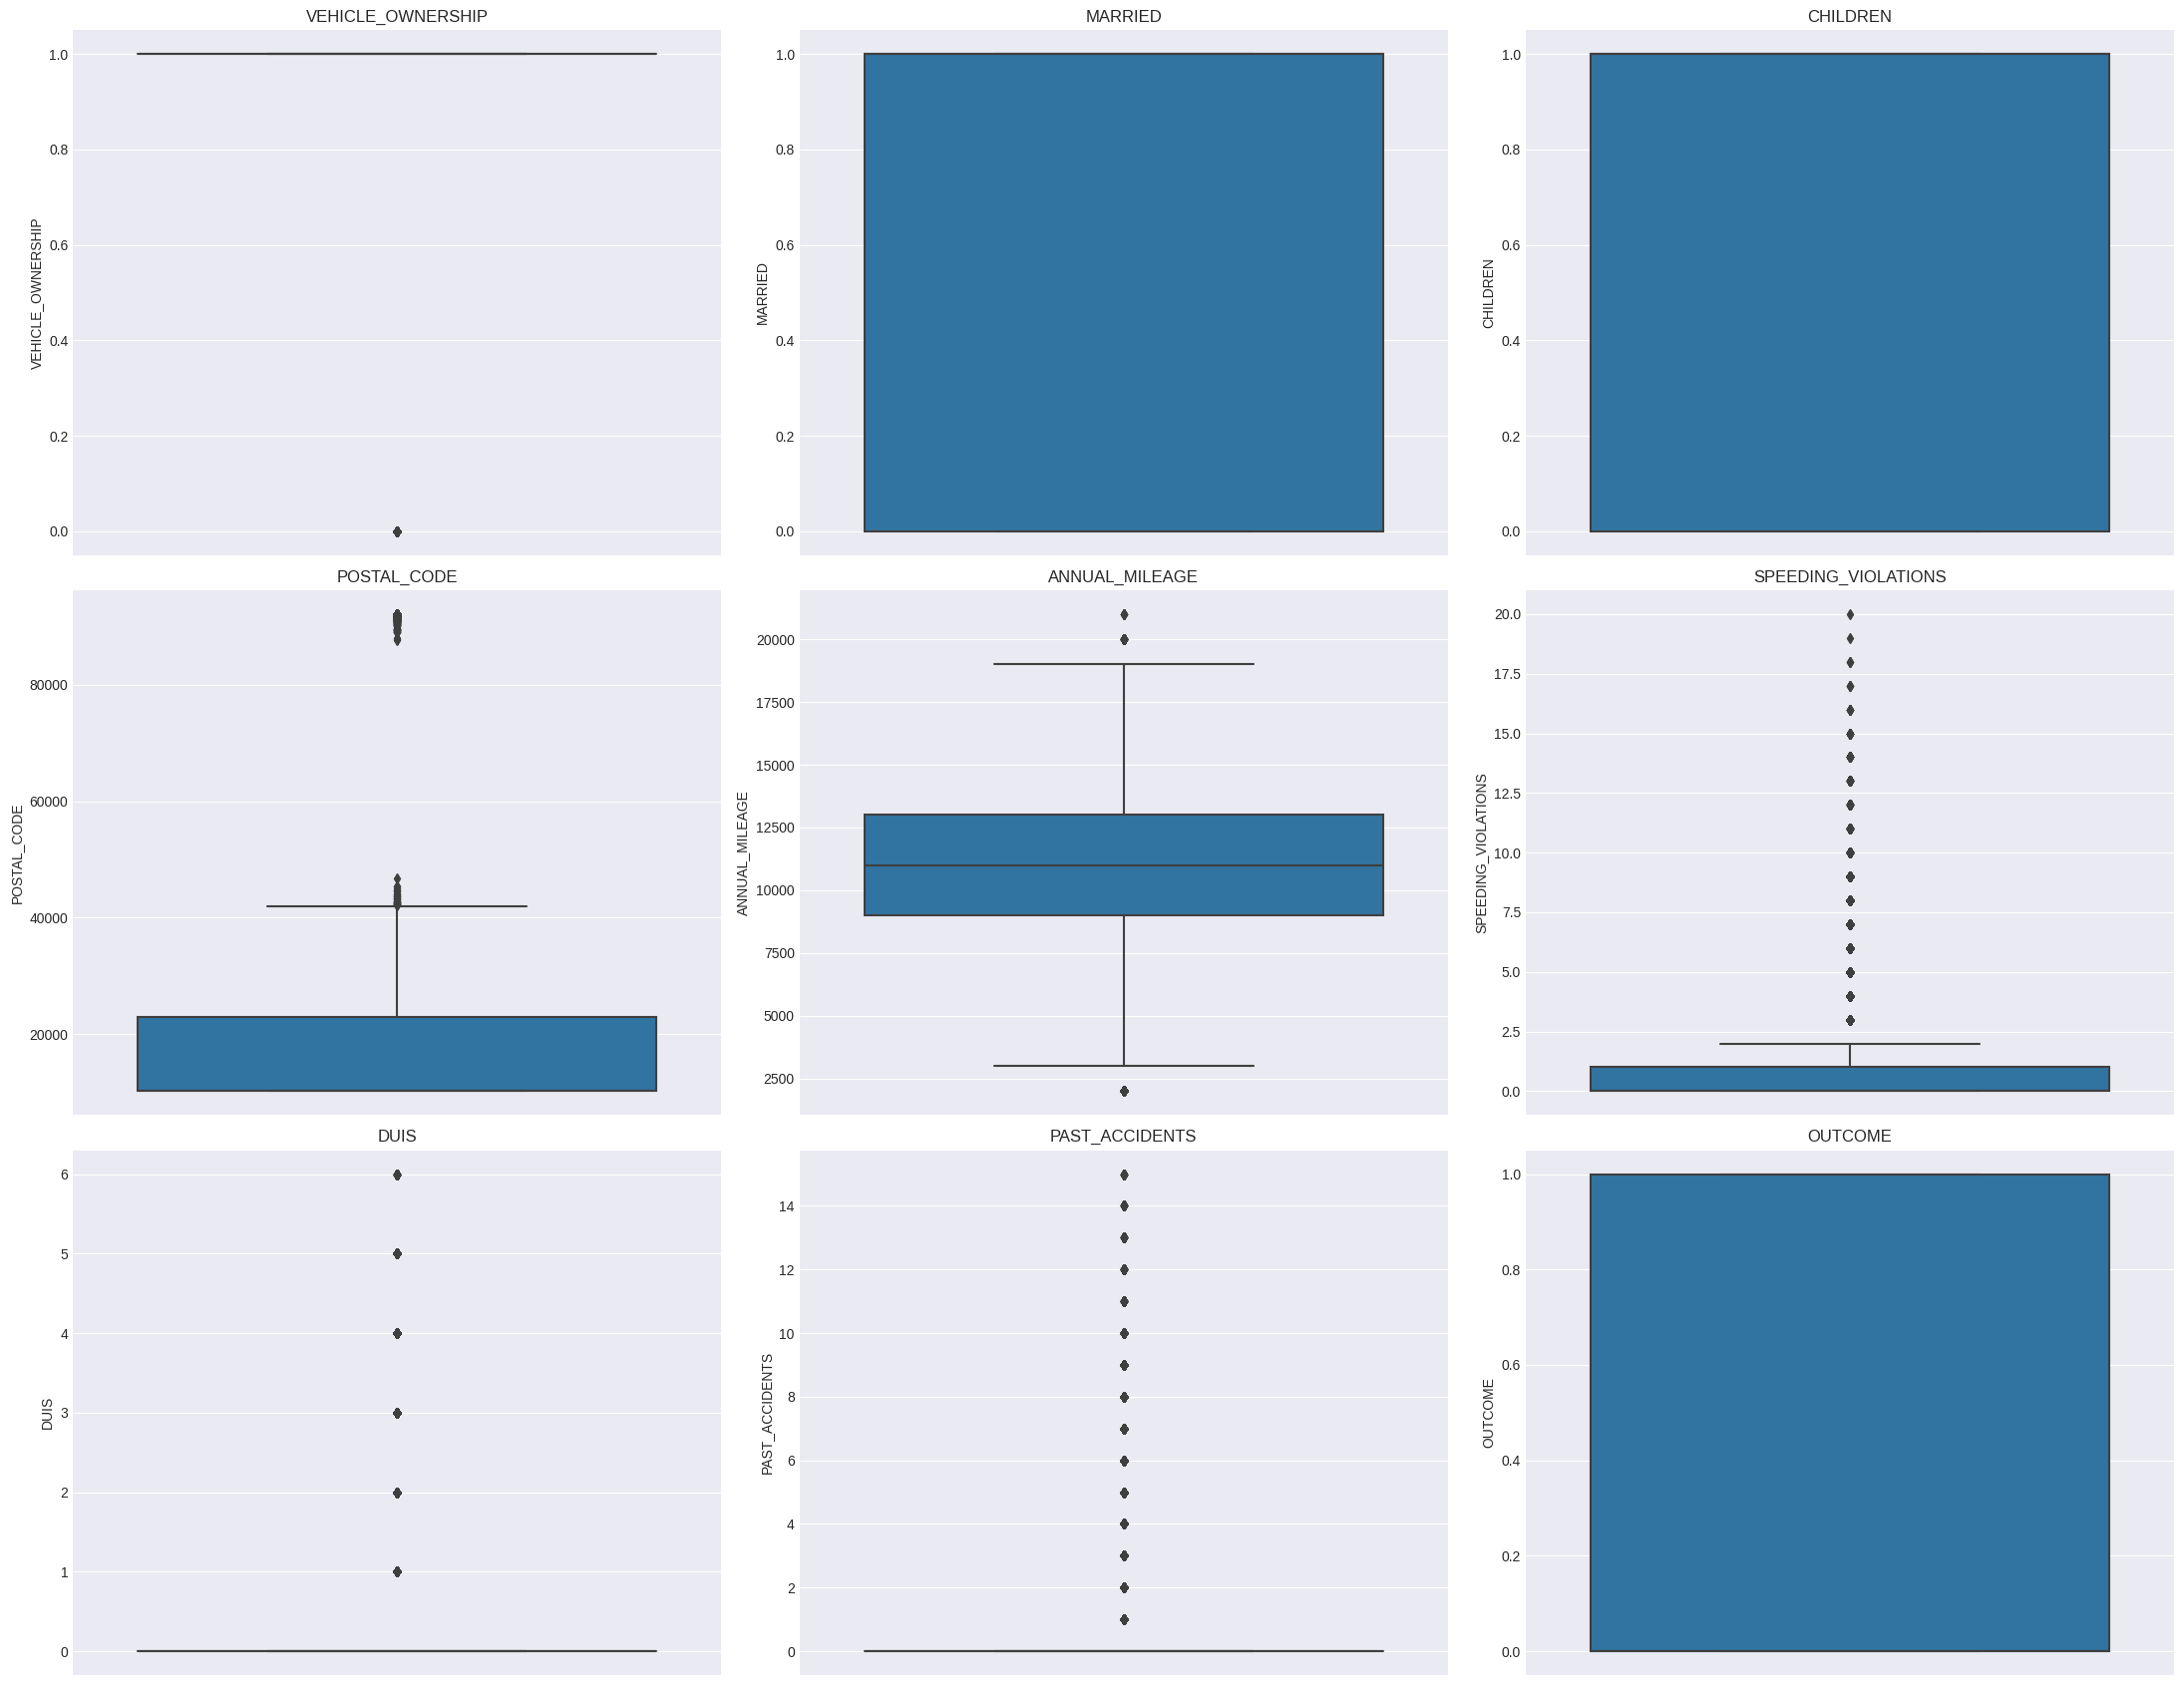

In [16]:
plt.figure(figsize=(22,17))
for i,col in enumerate(num_df):
    plt.subplot(3,3, i+1)
    sns.boxplot(y=col, data=num_df)
    plt.title(col)
    plt.tight_layout()

##### Insights:
- Most of the data lie in one category that's why it is showing other data as outliers
- By the above boxplot analysis, there is outliers in Postal_code, annual_mileage, Speeding_violations, Duis and past_accidents.
- Let's see the value counts of these columns

### Handling outliers

In [17]:
l = ['POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
for i in l:
    print(i,'\n',round((num_df[i].value_counts(normalize=True))*100,2))
    print('-'*50,'\n')

POSTAL_CODE 
 10238    73.91
92101     1.26
92100     0.38
92099     0.15
92098     0.12
         ...  
36436     0.00
24172     0.00
26996     0.00
29021     0.00
20934     0.00
Name: POSTAL_CODE, Length: 10937, dtype: float64
-------------------------------------------------- 

ANNUAL_MILEAGE 
 14000.0    15.49
10000.0    15.43
13000.0    15.00
9000.0     11.42
11000.0     9.98
12000.0     8.16
7000.0      5.76
15000.0     4.94
6000.0      3.48
8000.0      3.01
16000.0     2.25
3000.0      1.44
4000.0      1.12
5000.0      0.88
17000.0     0.59
2000.0      0.53
18000.0     0.30
19000.0     0.15
20000.0     0.07
21000.0     0.00
Name: ANNUAL_MILEAGE, dtype: float64
-------------------------------------------------- 

SPEEDING_VIOLATIONS 
 0     65.87
1     18.92
2      8.33
3      2.85
4      1.61
5      0.87
6      0.46
7      0.33
8      0.25
9      0.16
10     0.10
11     0.08
13     0.06
12     0.05
14     0.02
15     0.01
16     0.01
17     0.00
18     0.00
20     0.00
19     0.0

After seeing value counts of particular columns, All of them have outliers.<br>
Let's impute them with some values.

In [18]:
# In column ANNUAL_MILEAGE replacing values 21000 and 20000 to 19000
df_train1['ANNUAL_MILEAGE'] = df_train1['ANNUAL_MILEAGE'].replace(to_replace=[20000,21000], value=19000)

In [19]:
#Checking the replaced value is fixed
df_train1['ANNUAL_MILEAGE'].value_counts()

14000.0    16266
10000.0    16205
13000.0    15750
9000.0     11986
11000.0    10474
12000.0     8564
7000.0      6043
15000.0     5191
6000.0      3652
8000.0      3160
16000.0     2365
3000.0      1515
4000.0      1180
5000.0       921
17000.0      620
2000.0       552
18000.0      315
19000.0      241
Name: ANNUAL_MILEAGE, dtype: int64

In [20]:
# In column SPEEDING_VIOLATIONS replacing values 16, 17, 18, 19, 20 to 15
df_train1['SPEEDING_VIOLATIONS'] = df_train1['SPEEDING_VIOLATIONS'].replace(to_replace=[16, 17, 18, 19, 20], value=15)

In [21]:
#Checking the replaced value is fixed
df_train1['SPEEDING_VIOLATIONS'].value_counts()

0     69163
1     19867
2      8749
3      2990
4      1688
5       911
6       483
7       351
8       260
9       172
10      109
11       87
13       58
12       56
15       31
14       25
Name: SPEEDING_VIOLATIONS, dtype: int64

In [22]:
# In column DUIS replacing value 6 to 5
df_train1['DUIS'] = df_train1['DUIS'].replace(to_replace=6 , value=5)

In [23]:
#Checking the replaced value is fixed
df_train1['DUIS'].value_counts()

0    98246
1     3430
2     1219
3     1069
4      709
5      327
Name: DUIS, dtype: int64

In [24]:
# In column PAST_ACCIDENTS replacing value 15 to 14
df_train1['PAST_ACCIDENTS'] = df_train1['PAST_ACCIDENTS'].replace(to_replace=15 , value=14)

In [25]:
#Checking the replaced value is fixed
df_train1['PAST_ACCIDENTS'].value_counts()

0     78853
1     13762
2      6454
3      1749
4      1317
5       906
6       534
7       413
8       340
9       236
10      157
11       92
12       75
14       62
13       50
Name: PAST_ACCIDENTS, dtype: int64

### Exploratory Data Analysis

In [26]:
numerical_list = df_train1.select_dtypes(exclude='object').columns.to_list()
categorical_list = df_train1.select_dtypes(include='object').columns.to_list()
print(categorical_list, '\n')
print(numerical_list)

['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'TYPE_OF_VEHICLE'] 

['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']


#### Univariate Analysis

>  Visualizing numerical features

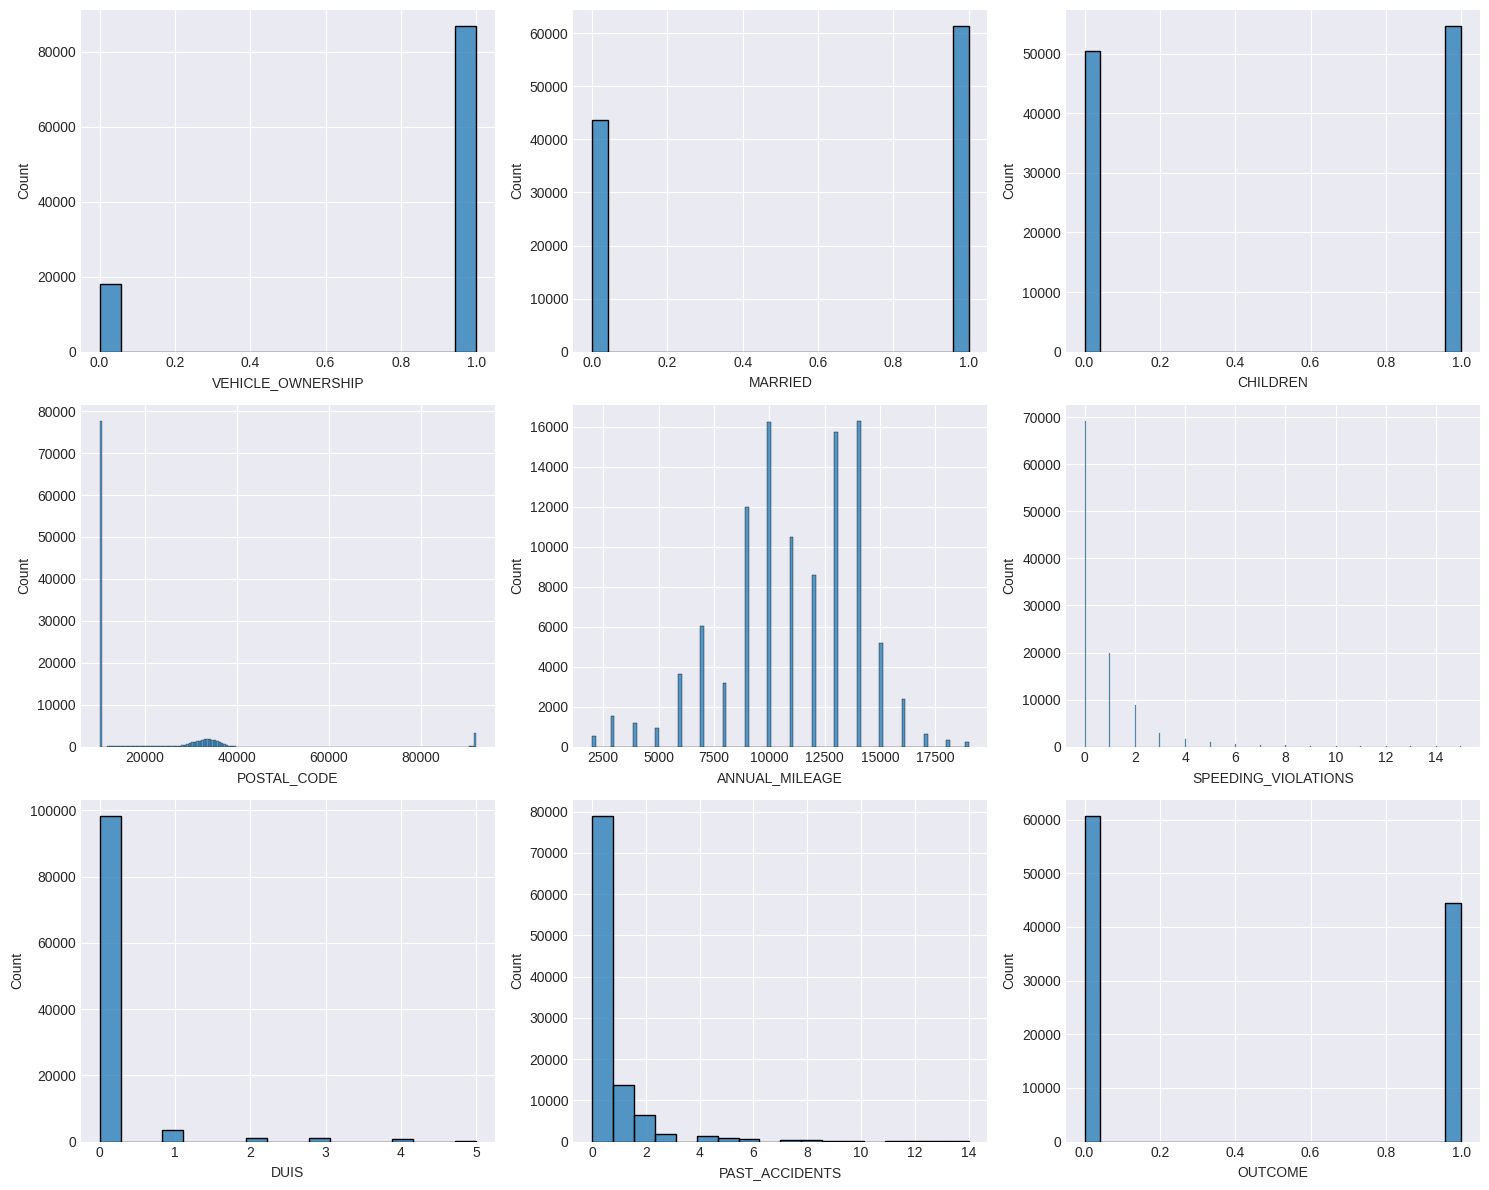

In [27]:
fig, ax = plt.subplots(3,3, figsize = (15,12))
for var, subplot in zip(df_train1[numerical_list], ax.flatten()):
    sns.histplot(x=var, data=df_train1[numerical_list], ax=subplot)
    plt.tight_layout()

##### Insights:
- <b>VEHICLE_OWNERSHIP</b>: People who own vehicles are claiming for insurance.
- <b>MARRIED</b>: People who were married claim more insurance than others.
- <b>CHILDREN</b>: Children are claiming than the others.
- <b>POSTAL_CODE</b>: Over 70% of those who file insurance claims from the same postal code.
- <b>ANNUAL_MILEAGE</b>: People who have an annual mileage between 8000 to 14000 claim for insurance more than the others.
- <b>SPEEDING_VIOLATIONS</b>: People who have not done any speed violations claim for insurance are more than the others.
- <b>DUIS</b>: People who have not done any DUIS claim for insurance are more than the others.
- <b>PAST_ACCIDENT</b>: People who have not done accidents till now are claiming for insurance are more than the others.
- <b>OUTCOME</b>: Rejected claims are more than the accepted claims.

From above analysis droping POSTAL_CODE feature from data because it have one value which covered 70% data of that column, it will make model bias.

In [28]:
#Droping POSTAL_CODE from train data
df_train1 = df_train1.drop('POSTAL_CODE', axis=1)
numerical_list.remove('POSTAL_CODE')
numerical_list.remove('OUTCOME')
print(numerical_list)
df_train1


['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']


,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,40-64,female,20-29y,university,middle class,0.0,after 2015,0.0,0.0,11000.0,0,0,0,0.0,Sports Car
1,26-39,male,20-29y,high school,middle class,1.0,before 2015,1.0,0.0,9000.0,0,0,0,1.0,HatchBack
2,40-64,male,20-29y,none,middle class,1.0,before 2015,1.0,1.0,12000.0,0,0,0,1.0,Sedan
3,40-64,male,20-29y,high school,upper class,1.0,before 2015,0.0,1.0,6000.0,1,0,0,1.0,Sedan
4,40-64,female,20-29y,none,working class,1.0,after 2015,1.0,1.0,15000.0,0,0,1,0.0,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,65+,female,0-9y,high school,upper class,1.0,before 2015,0.0,0.0,9000.0,2,0,0,0.0,SUV
104996,40-64,female,0-9y,none,working class,1.0,after 2015,1.0,0.0,10000.0,0,0,0,1.0,Sedan
104997,16-25,male,10-19y,none,upper class,1.0,after 2015,1.0,0.0,11000.0,0,0,0,1.0,Sedan
104998,40-64,female,20-29y,high school,working class,1.0,before 2015,0.0,0.0,10000.0,0,0,0,0.0,HatchBack


> Visualizing categorical features

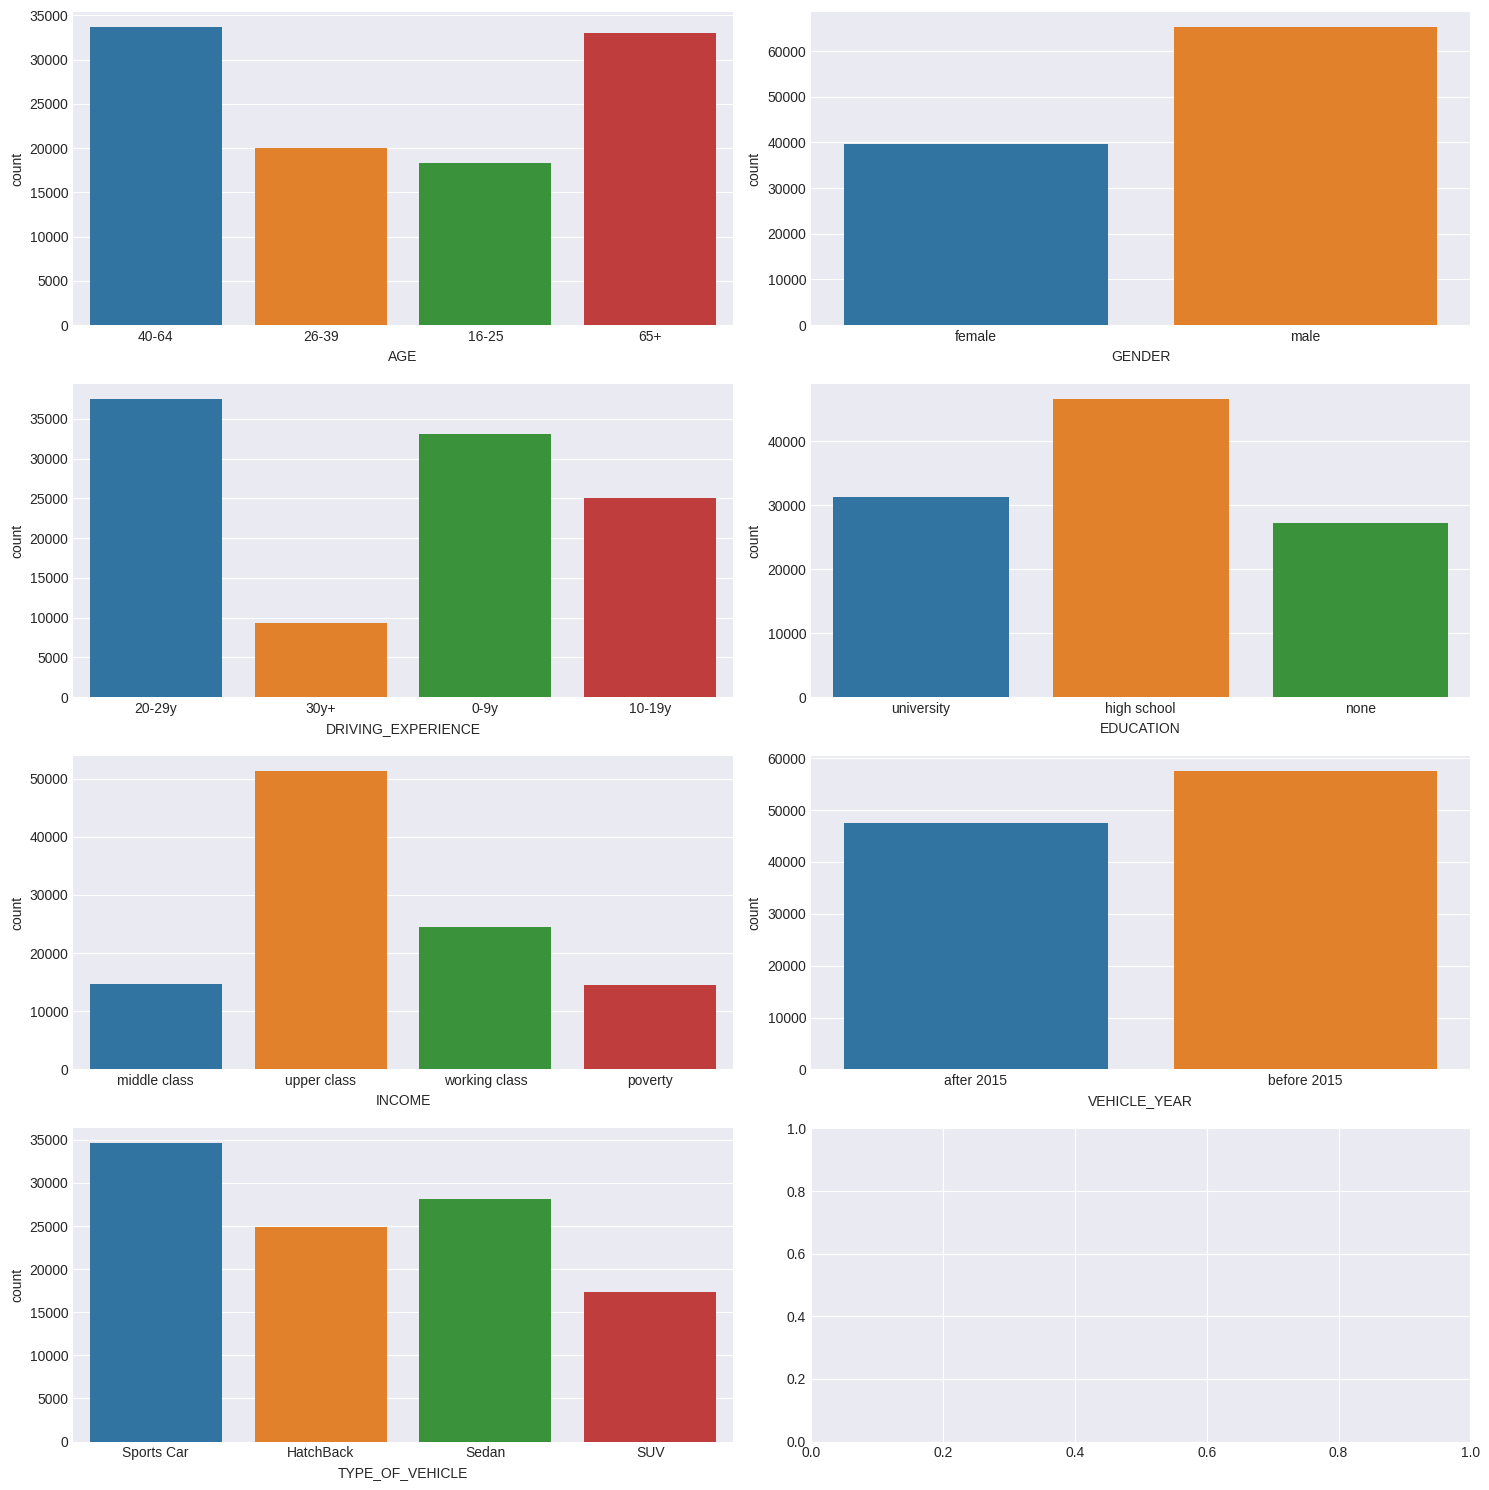

In [29]:
fig, ax = plt.subplots(4,2,figsize=(15,15))
for var, subplots in zip(df_train1[categorical_list], ax.flatten()):
    sns.countplot(x=var, data=df_train1[categorical_list], ax=subplots)
    plt.tight_layout()

##### Insights:
- <b>AGE</b>: People over the age of 40 claim more insurance than others.
- <b>GENDER</b>: Males claim more insurance than females.
- <b>DRIVING_EXPERIENCE</b>: People have 20-29 years of driving experience claim for insurance more than others.
- <b>EDUCATION</b>: People who are high school students claim for insurance more than others.
- <b>INCOME</b>: People who come in upper class claim for insurance more than others.
- <b>VEHICLE_YEAR</b>: Vehicles bought before 2015 are mostly claims for insurance.
- <b>TYPE_OF_VEHICLE</b>: People who claim for insurance mostly have sports cars and are followed by sedans.

#### Bivariate Analysis

>Numerical features vs target column `OUTCOME`

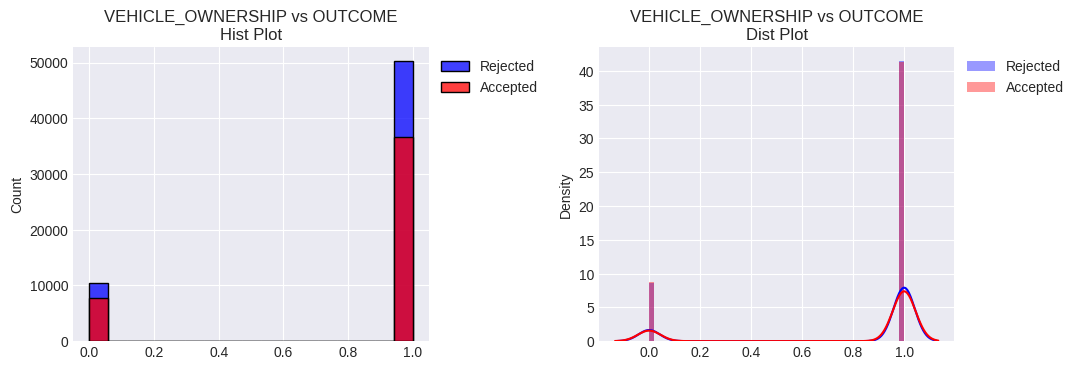

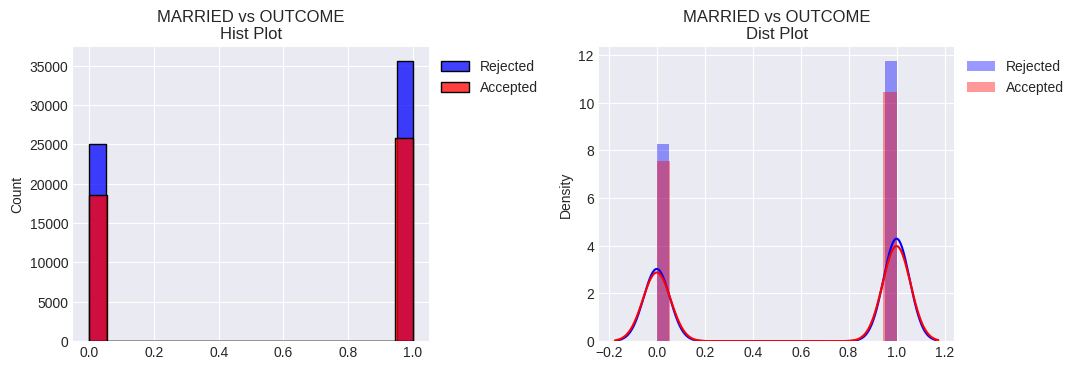

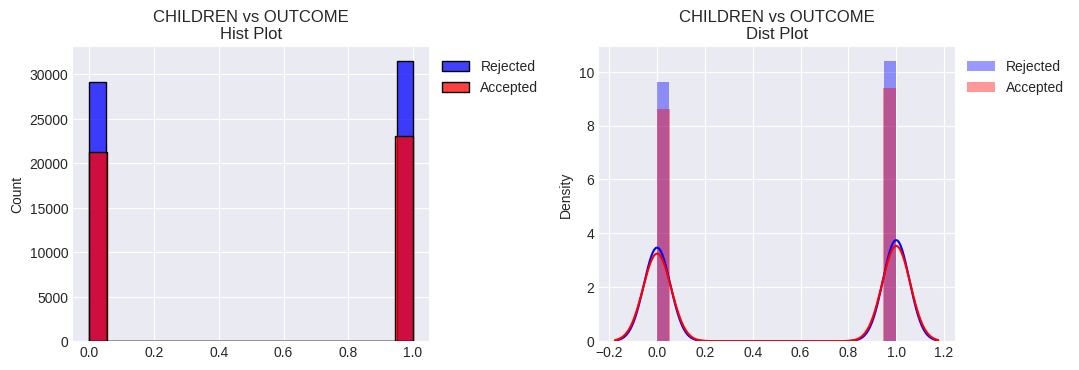

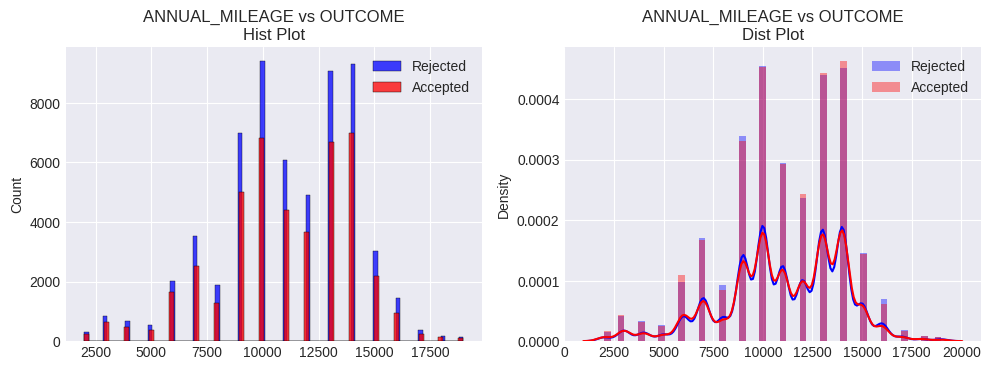

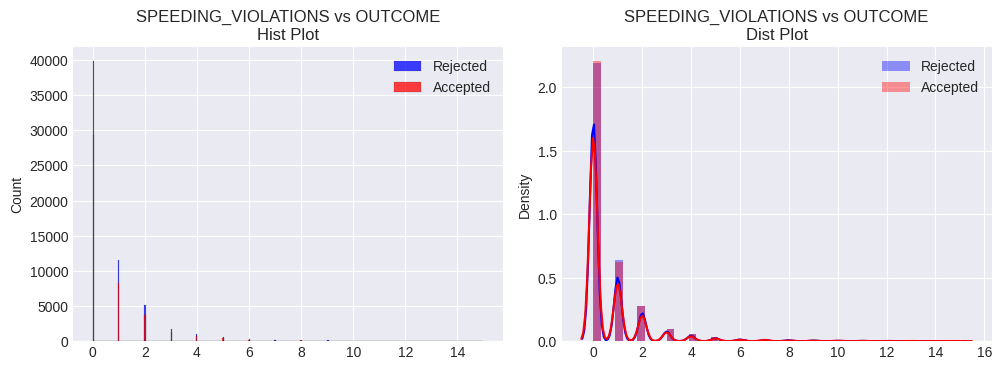

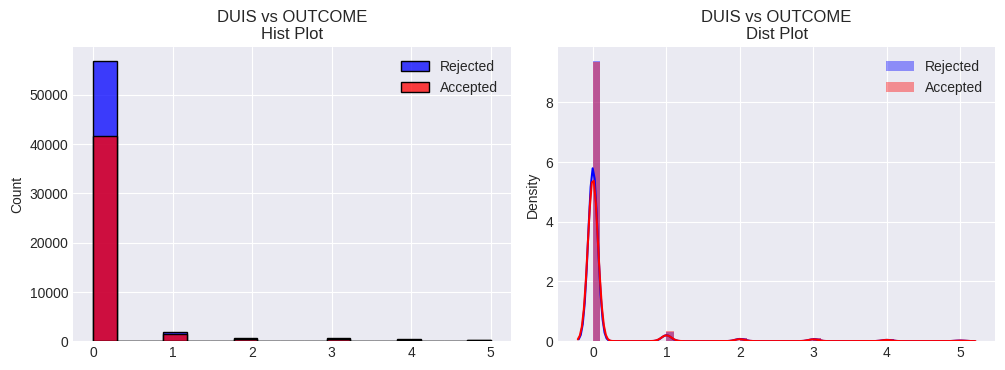

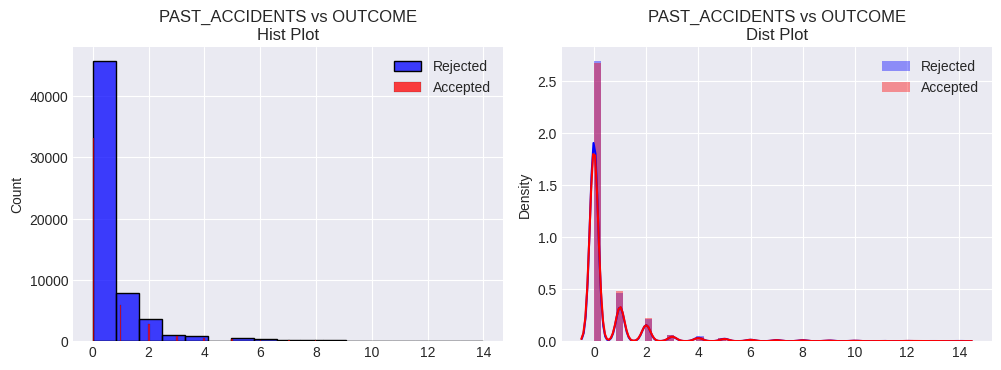

In [30]:
for index,col in enumerate(df_train1[numerical_list]):
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.histplot(df_train1[df_train1.OUTCOME==0][col],label='Rejected', color='blue')
    sns.histplot(df_train1[df_train1.OUTCOME==1][col],label='Accepted', color='red')
    plt.legend(bbox_to_anchor=[1,1],fontsize=10)
    plt.tight_layout()
    plt.title(f'{col} vs OUTCOME\nHist Plot')
    plt.xlabel("")
    
    plt.subplot(1,3,2)
    sns.distplot(df_train1[df_train1.OUTCOME==0][col],label='Rejected', color='blue')
    sns.distplot(df_train1[df_train1.OUTCOME==1][col],label='Accepted', color='red')
    plt.legend(bbox_to_anchor=[1,1],fontsize=10)
    plt.title(f'{col} vs OUTCOME\nDist Plot')
    plt.tight_layout()
    plt.xlabel("")

>Categorical features vs target column `OUTCOME`

In [31]:
def categorical_plots(col1,col2, subplots):
    cstb = pd.crosstab(col1, col2)
    return cstb.plot(kind="bar", stacked=True, ax=subplots)

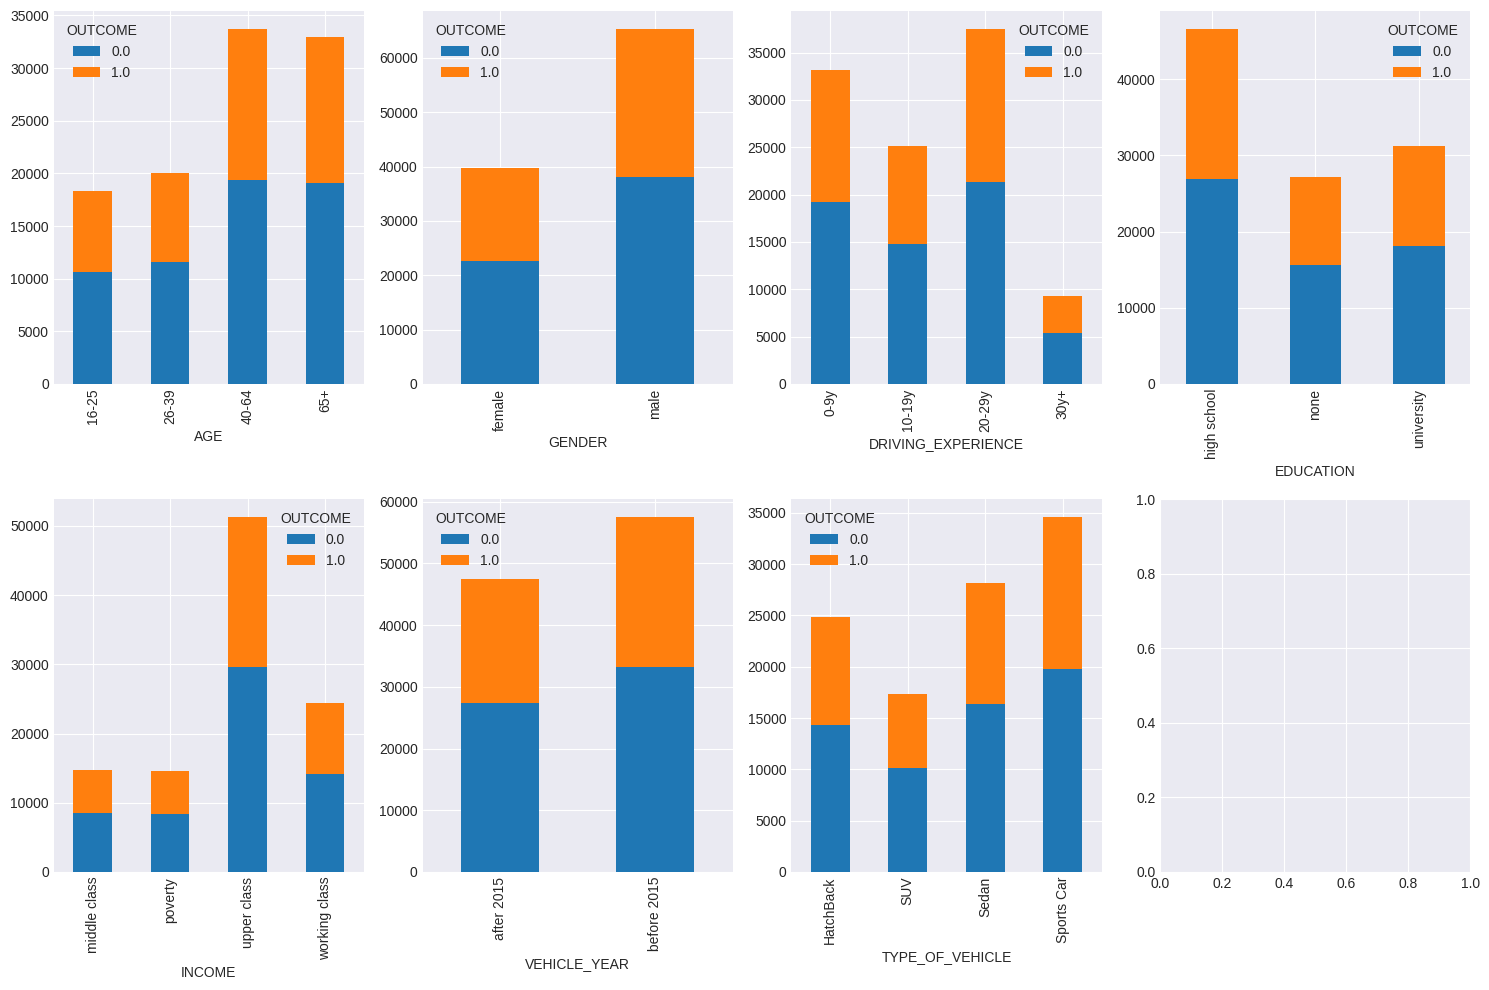

In [32]:
fig, ax = plt.subplots(2,4,figsize=(15,10))
for var, subplots in zip(df_train1[categorical_list], ax.flatten()):
    categorical_plots(df_train1[var], df_train1['OUTCOME'], subplots)
    plt.tight_layout()

In [33]:
#droping columns from test data as did for train data in above analysis
df_test = df_test.drop(['ID', 'CREDIT_SCORE', 'POSTAL_CODE'], axis=1)
df_test

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,40-64,male,10-19y,none,working class,1.0,after 2015,0.0,1.0,10000.0,0,0,0,HatchBack
1,26-39,female,20-29y,high school,upper class,1.0,before 2015,0.0,0.0,13000.0,0,0,0,Sedan
2,40-64,male,10-19y,none,upper class,0.0,after 2015,1.0,0.0,12000.0,0,0,0,SUV
3,26-39,male,20-29y,high school,upper class,1.0,after 2015,1.0,1.0,16000.0,1,0,0,SUV
4,65+,male,10-19y,none,middle class,0.0,after 2015,0.0,1.0,14000.0,2,0,0,HatchBack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,65+,female,20-29y,high school,poverty,1.0,before 2015,1.0,0.0,10000.0,0,0,1,Sports Car
44996,40-64,male,20-29y,university,working class,0.0,before 2015,1.0,0.0,12000.0,0,0,0,Sports Car
44997,40-64,male,10-19y,none,poverty,0.0,after 2015,0.0,0.0,13000.0,0,0,0,Sedan
44998,65+,male,30y+,high school,upper class,1.0,before 2015,1.0,0.0,13000.0,1,0,0,Sports Car


### Data Preparation for Modeling

In [34]:
#Copying 'df_train1' from  another variable
df_train2 = df_train1.copy()
print(df_train2.shape)
df_train2.head()

(105000, 15)


,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,40-64,female,20-29y,university,middle class,0.0,after 2015,0.0,0.0,11000.0,0,0,0,0.0,Sports Car
1,26-39,male,20-29y,high school,middle class,1.0,before 2015,1.0,0.0,9000.0,0,0,0,1.0,HatchBack
2,40-64,male,20-29y,none,middle class,1.0,before 2015,1.0,1.0,12000.0,0,0,0,1.0,Sedan
3,40-64,male,20-29y,high school,upper class,1.0,before 2015,0.0,1.0,6000.0,1,0,0,1.0,Sedan
4,40-64,female,20-29y,none,working class,1.0,after 2015,1.0,1.0,15000.0,0,0,1,0.0,Sedan


> Label Encoding

In [35]:
categorical_list

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'TYPE_OF_VEHICLE']

In [36]:
# label encoding for categorical columns in train and test data
for i in categorical_list:
    le = LabelEncoder()
    le.fit(list(df_train2[i]) + list(df_test[i]))
    print( "{0} values:\n {1} \n {2}\n".format(i, dict(zip(le.classes_, le.transform(le.classes_))), '-'*100) )
    df_train2[i] = le.transform(df_train2[i])
    df_test[i] = le.transform(df_test[i])

AGE values:
 {'16-25': 0, '26-39': 1, '40-64': 2, '65+': 3} 
 ----------------------------------------------------------------------------------------------------

GENDER values:
 {'female': 0, 'male': 1} 
 ----------------------------------------------------------------------------------------------------

DRIVING_EXPERIENCE values:
 {'0-9y': 0, '10-19y': 1, '20-29y': 2, '30y+': 3} 
 ----------------------------------------------------------------------------------------------------

EDUCATION values:
 {'high school': 0, 'none': 1, 'university': 2} 
 ----------------------------------------------------------------------------------------------------

INCOME values:
 {'middle class': 0, 'poverty': 1, 'upper class': 2, 'working class': 3} 
 ----------------------------------------------------------------------------------------------------

VEHICLE_YEAR values:
 {'after 2015': 0, 'before 2015': 1} 
 ----------------------------------------------------------------------------------------

In [37]:
df_train2

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,2,0,2,2,0,0.0,0,0.0,0.0,11000.0,0,0,0,0.0,3
1,1,1,2,0,0,1.0,1,1.0,0.0,9000.0,0,0,0,1.0,0
2,2,1,2,1,0,1.0,1,1.0,1.0,12000.0,0,0,0,1.0,2
3,2,1,2,0,2,1.0,1,0.0,1.0,6000.0,1,0,0,1.0,2
4,2,0,2,1,3,1.0,0,1.0,1.0,15000.0,0,0,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,3,0,0,0,2,1.0,1,0.0,0.0,9000.0,2,0,0,0.0,1
104996,2,0,0,1,3,1.0,0,1.0,0.0,10000.0,0,0,0,1.0,2
104997,0,1,1,1,2,1.0,0,1.0,0.0,11000.0,0,0,0,1.0,2
104998,2,0,2,0,3,1.0,1,0.0,0.0,10000.0,0,0,0,0.0,0


In [38]:
df_test

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,2,1,1,1,3,1.0,0,0.0,1.0,10000.0,0,0,0,0
1,1,0,2,0,2,1.0,1,0.0,0.0,13000.0,0,0,0,2
2,2,1,1,1,2,0.0,0,1.0,0.0,12000.0,0,0,0,1
3,1,1,2,0,2,1.0,0,1.0,1.0,16000.0,1,0,0,1
4,3,1,1,1,0,0.0,0,0.0,1.0,14000.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3,0,2,0,1,1.0,1,1.0,0.0,10000.0,0,0,1,3
44996,2,1,2,2,3,0.0,1,1.0,0.0,12000.0,0,0,0,3
44997,2,1,1,1,1,0.0,0,0.0,0.0,13000.0,0,0,0,2
44998,3,1,3,0,2,1.0,1,1.0,0.0,13000.0,1,0,0,3


In [39]:
df_train_scale = df_train2.copy()
#Scaling the data for training model
scaler = MinMaxScaler()
df_train_scale[df_train_scale.columns] = scaler.fit_transform(df_train_scale)
df_train_scale

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,0.666667,0.0,0.666667,1.0,0.000000,0.0,0.0,0.0,0.0,0.529412,0.000000,0.0,0.000000,0.0,1.000000
1,0.333333,1.0,0.666667,0.0,0.000000,1.0,1.0,1.0,0.0,0.411765,0.000000,0.0,0.000000,1.0,0.000000
2,0.666667,1.0,0.666667,0.5,0.000000,1.0,1.0,1.0,1.0,0.588235,0.000000,0.0,0.000000,1.0,0.666667
3,0.666667,1.0,0.666667,0.0,0.666667,1.0,1.0,0.0,1.0,0.235294,0.066667,0.0,0.000000,1.0,0.666667
4,0.666667,0.0,0.666667,0.5,1.000000,1.0,0.0,1.0,1.0,0.764706,0.000000,0.0,0.071429,0.0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,1.000000,0.0,0.000000,0.0,0.666667,1.0,1.0,0.0,0.0,0.411765,0.133333,0.0,0.000000,0.0,0.333333
104996,0.666667,0.0,0.000000,0.5,1.000000,1.0,0.0,1.0,0.0,0.470588,0.000000,0.0,0.000000,1.0,0.666667
104997,0.000000,1.0,0.333333,0.5,0.666667,1.0,0.0,1.0,0.0,0.529412,0.000000,0.0,0.000000,1.0,0.666667
104998,0.666667,0.0,0.666667,0.0,1.000000,1.0,1.0,0.0,0.0,0.470588,0.000000,0.0,0.000000,0.0,0.000000


In [40]:
X = df_train_scale.drop('OUTCOME', axis=1)
y = df_train_scale.OUTCOME
print(X.shape)
print(y.shape)

(105000, 14)
(105000,)


> <b>Train Test Split

In [41]:
#Splitting the train data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((84000, 14), (84000,), (21000, 14), (21000,))

In [224]:
def grid_search(model, parameters, X_train, y_train):

  grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, verbose=2, scoring='neg_log_loss')
  grid.fit(X_train, y_train)
  print('\n')

  opt_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return opt_model

In [225]:
def check_scores(model, X_train, X_test):
  #predictions on train and test data

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)


  #probabilities on train and test
  train_prob = model.predict_proba(X_train)
  test_prob = model.predict_proba(X_test)


  #accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_pred)
  test_accuracy = accuracy_score(y_test,test_pred)

  rfc = model
  kfold = KFold(n_splits=5)
  cv = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')

  print("\nThe accuracy on train dataset is", round(train_accuracy*100,0),'%')
  print("The accuracy on test dataset is", round(test_accuracy*100,0),'%')
  print(f'''{'-'*100}\n\nKFOLD Cross-Validation Average Accuracy : {round(cv.mean()*100)}%\n{cv}\n{'-'*100}''')
  print('\n')
  #confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_pred)
  test_cm = confusion_matrix(y_test,test_pred )

  print('Train confusion matrix:')
  print( train_cm)
  print('\n')
  print('Test confusion matrix:')
  print(test_cm)
  print('\n')
  print('Classification report train')
  print(classification_report(y_train, train_pred))
  print('\n')
  print('Classification report test')
  print(classification_report(y_test, test_pred))
    

### Model Training

In [44]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

dic = {}
for i in range(len(fs.scores_)):
    dic[X_train.columns[i]] = fs.scores_[i]
sorted(dic.items(),key= lambda x: x[1],reverse=True)

[('GENDER', 6.030127724670331),
 ('DRIVING_EXPERIENCE', 2.4879445964615243),
 ('MARRIED', 1.0182487654618808),
 ('PAST_ACCIDENTS', 0.5340098372176898),
 ('TYPE_OF_VEHICLE', 0.47738184211563417),
 ('VEHICLE_OWNERSHIP', 0.28599890013702767),
 ('EDUCATION', 0.21173731758537936),
 ('AGE', 0.18969669794317517),
 ('SPEEDING_VIOLATIONS', 0.05799330911888437),
 ('CHILDREN', 0.022742749925004815),
 ('VEHICLE_YEAR', 0.0061941202923311445),
 ('ANNUAL_MILEAGE', 0.006022860464525087),
 ('DUIS', 0.00195401504131803),
 ('INCOME', 0.0002607651416019016)]

In [45]:
#'INCOME', 'TYPE_OF_VEHICLE', 'EDUCATION', 'VEHICLE_OWNERSHIP', 'AGE'
col = ['GENDER', 'DRIVING_EXPERIENCE', 'MARRIED']

> <b> Model 2<br><br>
     Gradient Boosting Classifier </b>

In [53]:
X=df_train2.drop('OUTCOME', axis=1)
y = df_train2.OUTCOME

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)

hgb_parameters ={
    "max_iter":[100,500,1000,1500,2000],
    "learning_rate":[0.001,0.01,0.1,1,10],
    "max_depth":[3,5,7],
    "validation_fraction": [0.2]
}

hgb_model = grid_search(HistGradientBoostingClassifier(random_state=42), hgb_parameters, X_train, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits
[CV] END learning_rate=0.001, max_depth=3, max_iter=100, validation_fraction=0.2; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, max_iter=100, validation_fraction=0.2; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, max_iter=100, validation_fraction=0.2; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, max_iter=100, validation_fraction=0.2; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, max_iter=500, validation_fraction=0.2; total time=   2.5s
[CV] END learning_rate=0.001, max_depth=3, max_iter=500, validation_fraction=0.2; total time=   0.9s
[CV] END learning_rate=0.001, max_depth=3, max_iter=500, validation_fraction=0.2; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, max_iter=500, validation_fraction=0.2; total time=   2.2s
[CV] END learning_rate=0.001, max_depth=3, max_iter=1000, validation_fraction=0.2; total time=   5.3s
[CV] END learning_rate=0.001

[CV] END learning_rate=0.01, max_depth=5, max_iter=100, validation_fraction=0.2; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, max_iter=100, validation_fraction=0.2; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, max_iter=100, validation_fraction=0.2; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, max_iter=500, validation_fraction=0.2; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, max_iter=500, validation_fraction=0.2; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, max_iter=500, validation_fraction=0.2; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, max_iter=500, validation_fraction=0.2; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_iter=1000, validation_fraction=0.2; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, max_iter=1000, validation_fraction=0.2; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, max_iter=1000, validation_fraction=0.2; total time=   0.

[CV] END learning_rate=0.1, max_depth=7, max_iter=100, validation_fraction=0.2; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=7, max_iter=500, validation_fraction=0.2; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, max_iter=500, validation_fraction=0.2; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=7, max_iter=500, validation_fraction=0.2; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_iter=500, validation_fraction=0.2; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_iter=1000, validation_fraction=0.2; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_iter=1000, validation_fraction=0.2; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, max_iter=1000, validation_fraction=0.2; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_iter=1000, validation_fraction=0.2; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, max_iter=1500, validation_fraction=0.2; total time=   0.3s
[CV] 

[CV] END learning_rate=10, max_depth=3, max_iter=1000, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=1000, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=1000, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=1000, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=1500, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=1500, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=1500, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=1500, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=2000, validation_fraction=0.2; total time=   0.1s
[CV] END learning_rate=10, max_depth=3, max_iter=2000, validation_fraction=0.2; total time=   0.1s
[CV] END l

In [54]:
check_scores(hgb_model,X_train,X_test)


The accuracy on train dataset is 58.0 %
The accuracy on test dataset is 58.0 %
----------------------------------------------------------------------------------------------------

KFOLD Cross-Validation Average Accuracy : 58%
[0.57488095 0.57827381 0.57809524 0.57619048 0.5777381 ]
----------------------------------------------------------------------------------------------------


Train confusion matrix:
[[48441    15]
 [35509    35]]


Test confusion matrix:
[[12155    11]
 [ 8823    11]]


Classification report train
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     48456
         1.0       0.70      0.00      0.00     35544

    accuracy                           0.58     84000
   macro avg       0.64      0.50      0.37     84000
weighted avg       0.63      0.58      0.42     84000



Classification report test
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     12166
      

> <b> Model 3<br><br>
     Cat Boost Classifier </b>

In [46]:
cb_model = CatBoostClassifier(learning_rate= 0.01, iterations=1000, random_state=42)
cb_model.fit(X_train, y_train)

0:	learn: 0.6929213	total: 146ms	remaining: 2m 25s
1:	learn: 0.6926703	total: 177ms	remaining: 1m 28s
2:	learn: 0.6924300	total: 209ms	remaining: 1m 9s
3:	learn: 0.6921972	total: 232ms	remaining: 57.7s
4:	learn: 0.6919704	total: 245ms	remaining: 48.8s
5:	learn: 0.6917526	total: 257ms	remaining: 42.6s
6:	learn: 0.6915413	total: 265ms	remaining: 37.6s
7:	learn: 0.6913267	total: 276ms	remaining: 34.3s
8:	learn: 0.6911210	total: 287ms	remaining: 31.6s
9:	learn: 0.6909182	total: 300ms	remaining: 29.7s
10:	learn: 0.6907192	total: 311ms	remaining: 28s
11:	learn: 0.6905216	total: 322ms	remaining: 26.5s
12:	learn: 0.6903279	total: 332ms	remaining: 25.2s
13:	learn: 0.6901366	total: 343ms	remaining: 24.2s
14:	learn: 0.6899514	total: 360ms	remaining: 23.6s
15:	learn: 0.6897674	total: 376ms	remaining: 23.1s
16:	learn: 0.6895885	total: 388ms	remaining: 22.5s
17:	learn: 0.6894080	total: 403ms	remaining: 22s
18:	learn: 0.6892374	total: 416ms	remaining: 21.5s
19:	learn: 0.6890662	total: 429ms	remaining

161:	learn: 0.6806775	total: 2.21s	remaining: 11.4s
162:	learn: 0.6806653	total: 2.23s	remaining: 11.4s
163:	learn: 0.6806516	total: 2.24s	remaining: 11.4s
164:	learn: 0.6806325	total: 2.25s	remaining: 11.4s
165:	learn: 0.6806162	total: 2.27s	remaining: 11.4s
166:	learn: 0.6806019	total: 2.28s	remaining: 11.4s
167:	learn: 0.6805860	total: 2.29s	remaining: 11.3s
168:	learn: 0.6805695	total: 2.3s	remaining: 11.3s
169:	learn: 0.6805517	total: 2.31s	remaining: 11.3s
170:	learn: 0.6805414	total: 2.32s	remaining: 11.3s
171:	learn: 0.6805258	total: 2.33s	remaining: 11.2s
172:	learn: 0.6805114	total: 2.34s	remaining: 11.2s
173:	learn: 0.6805022	total: 2.35s	remaining: 11.2s
174:	learn: 0.6804874	total: 2.37s	remaining: 11.2s
175:	learn: 0.6804707	total: 2.38s	remaining: 11.1s
176:	learn: 0.6804557	total: 2.39s	remaining: 11.1s
177:	learn: 0.6804417	total: 2.4s	remaining: 11.1s
178:	learn: 0.6804306	total: 2.41s	remaining: 11.1s
179:	learn: 0.6804169	total: 2.43s	remaining: 11.1s
180:	learn: 0.

323:	learn: 0.6792384	total: 4.28s	remaining: 8.93s
324:	learn: 0.6792325	total: 4.29s	remaining: 8.92s
325:	learn: 0.6792265	total: 4.31s	remaining: 8.91s
326:	learn: 0.6792191	total: 4.32s	remaining: 8.89s
327:	learn: 0.6792084	total: 4.33s	remaining: 8.87s
328:	learn: 0.6792025	total: 4.34s	remaining: 8.86s
329:	learn: 0.6791962	total: 4.35s	remaining: 8.84s
330:	learn: 0.6791906	total: 4.37s	remaining: 8.82s
331:	learn: 0.6791845	total: 4.38s	remaining: 8.81s
332:	learn: 0.6791805	total: 4.39s	remaining: 8.79s
333:	learn: 0.6791739	total: 4.4s	remaining: 8.77s
334:	learn: 0.6791646	total: 4.41s	remaining: 8.76s
335:	learn: 0.6791576	total: 4.42s	remaining: 8.74s
336:	learn: 0.6791491	total: 4.44s	remaining: 8.73s
337:	learn: 0.6791424	total: 4.45s	remaining: 8.71s
338:	learn: 0.6791353	total: 4.46s	remaining: 8.7s
339:	learn: 0.6791303	total: 4.47s	remaining: 8.69s
340:	learn: 0.6791255	total: 4.49s	remaining: 8.68s
341:	learn: 0.6791184	total: 4.51s	remaining: 8.67s
342:	learn: 0.

491:	learn: 0.6781997	total: 6.34s	remaining: 6.54s
492:	learn: 0.6781922	total: 6.35s	remaining: 6.53s
493:	learn: 0.6781860	total: 6.37s	remaining: 6.52s
494:	learn: 0.6781797	total: 6.38s	remaining: 6.51s
495:	learn: 0.6781719	total: 6.39s	remaining: 6.49s
496:	learn: 0.6781650	total: 6.4s	remaining: 6.48s
497:	learn: 0.6781580	total: 6.42s	remaining: 6.47s
498:	learn: 0.6781544	total: 6.43s	remaining: 6.45s
499:	learn: 0.6781440	total: 6.44s	remaining: 6.44s
500:	learn: 0.6781381	total: 6.45s	remaining: 6.42s
501:	learn: 0.6781308	total: 6.46s	remaining: 6.41s
502:	learn: 0.6781267	total: 6.47s	remaining: 6.39s
503:	learn: 0.6781201	total: 6.48s	remaining: 6.38s
504:	learn: 0.6781141	total: 6.49s	remaining: 6.37s
505:	learn: 0.6781105	total: 6.5s	remaining: 6.35s
506:	learn: 0.6781037	total: 6.52s	remaining: 6.34s
507:	learn: 0.6781008	total: 6.53s	remaining: 6.32s
508:	learn: 0.6780980	total: 6.54s	remaining: 6.31s
509:	learn: 0.6780938	total: 6.55s	remaining: 6.3s
510:	learn: 0.6

666:	learn: 0.6772243	total: 8.42s	remaining: 4.21s
667:	learn: 0.6772195	total: 8.44s	remaining: 4.19s
668:	learn: 0.6772133	total: 8.45s	remaining: 4.18s
669:	learn: 0.6772094	total: 8.46s	remaining: 4.17s
670:	learn: 0.6772039	total: 8.47s	remaining: 4.15s
671:	learn: 0.6772008	total: 8.48s	remaining: 4.14s
672:	learn: 0.6771962	total: 8.49s	remaining: 4.13s
673:	learn: 0.6771886	total: 8.5s	remaining: 4.11s
674:	learn: 0.6771816	total: 8.51s	remaining: 4.1s
675:	learn: 0.6771753	total: 8.52s	remaining: 4.08s
676:	learn: 0.6771724	total: 8.54s	remaining: 4.07s
677:	learn: 0.6771642	total: 8.55s	remaining: 4.06s
678:	learn: 0.6771590	total: 8.56s	remaining: 4.05s
679:	learn: 0.6771489	total: 8.57s	remaining: 4.03s
680:	learn: 0.6771447	total: 8.58s	remaining: 4.02s
681:	learn: 0.6771406	total: 8.6s	remaining: 4.01s
682:	learn: 0.6771347	total: 8.61s	remaining: 3.99s
683:	learn: 0.6771297	total: 8.62s	remaining: 3.98s
684:	learn: 0.6771244	total: 8.64s	remaining: 3.97s
685:	learn: 0.6

835:	learn: 0.6763239	total: 10.5s	remaining: 2.06s
836:	learn: 0.6763176	total: 10.5s	remaining: 2.05s
837:	learn: 0.6763111	total: 10.5s	remaining: 2.03s
838:	learn: 0.6763041	total: 10.5s	remaining: 2.02s
839:	learn: 0.6762956	total: 10.5s	remaining: 2.01s
840:	learn: 0.6762906	total: 10.6s	remaining: 2s
841:	learn: 0.6762850	total: 10.6s	remaining: 1.98s
842:	learn: 0.6762783	total: 10.6s	remaining: 1.97s
843:	learn: 0.6762747	total: 10.6s	remaining: 1.96s
844:	learn: 0.6762685	total: 10.6s	remaining: 1.95s
845:	learn: 0.6762644	total: 10.6s	remaining: 1.93s
846:	learn: 0.6762572	total: 10.6s	remaining: 1.92s
847:	learn: 0.6762506	total: 10.6s	remaining: 1.91s
848:	learn: 0.6762463	total: 10.7s	remaining: 1.89s
849:	learn: 0.6762431	total: 10.7s	remaining: 1.88s
850:	learn: 0.6762361	total: 10.7s	remaining: 1.87s
851:	learn: 0.6762313	total: 10.7s	remaining: 1.86s
852:	learn: 0.6762265	total: 10.7s	remaining: 1.84s
853:	learn: 0.6762236	total: 10.7s	remaining: 1.83s
854:	learn: 0.6

997:	learn: 0.6755003	total: 12.5s	remaining: 25.1ms
998:	learn: 0.6754951	total: 12.6s	remaining: 12.6ms
999:	learn: 0.6754886	total: 12.6s	remaining: 0us


In [47]:
check_scores(cb_model,X_train,X_test)

0:	learn: 0.6929027	total: 10.7ms	remaining: 10.7s
1:	learn: 0.6926593	total: 23.5ms	remaining: 11.7s
2:	learn: 0.6924129	total: 34.2ms	remaining: 11.4s
3:	learn: 0.6921745	total: 45.1ms	remaining: 11.2s
4:	learn: 0.6919428	total: 54.9ms	remaining: 10.9s
5:	learn: 0.6917203	total: 65.4ms	remaining: 10.8s
6:	learn: 0.6915053	total: 71.7ms	remaining: 10.2s
7:	learn: 0.6912850	total: 82.3ms	remaining: 10.2s
8:	learn: 0.6910743	total: 91.6ms	remaining: 10.1s
9:	learn: 0.6908609	total: 102ms	remaining: 10.1s
10:	learn: 0.6906564	total: 111ms	remaining: 10s
11:	learn: 0.6904557	total: 121ms	remaining: 9.92s
12:	learn: 0.6902567	total: 130ms	remaining: 9.9s
13:	learn: 0.6900620	total: 140ms	remaining: 9.87s
14:	learn: 0.6898729	total: 150ms	remaining: 9.85s
15:	learn: 0.6896832	total: 160ms	remaining: 9.86s
16:	learn: 0.6895004	total: 170ms	remaining: 9.81s
17:	learn: 0.6893136	total: 180ms	remaining: 9.84s
18:	learn: 0.6891390	total: 190ms	remaining: 9.8s
19:	learn: 0.6889629	total: 200ms	re

164:	learn: 0.6802617	total: 1.65s	remaining: 8.36s
165:	learn: 0.6802442	total: 1.66s	remaining: 8.36s
166:	learn: 0.6802344	total: 1.68s	remaining: 8.36s
167:	learn: 0.6802174	total: 1.69s	remaining: 8.35s
168:	learn: 0.6801989	total: 1.7s	remaining: 8.35s
169:	learn: 0.6801888	total: 1.71s	remaining: 8.33s
170:	learn: 0.6801725	total: 1.72s	remaining: 8.33s
171:	learn: 0.6801562	total: 1.73s	remaining: 8.33s
172:	learn: 0.6801456	total: 1.75s	remaining: 8.34s
173:	learn: 0.6801294	total: 1.76s	remaining: 8.35s
174:	learn: 0.6801161	total: 1.77s	remaining: 8.34s
175:	learn: 0.6801031	total: 1.78s	remaining: 8.34s
176:	learn: 0.6800880	total: 1.79s	remaining: 8.34s
177:	learn: 0.6800739	total: 1.8s	remaining: 8.33s
178:	learn: 0.6800576	total: 1.81s	remaining: 8.32s
179:	learn: 0.6800501	total: 1.82s	remaining: 8.29s
180:	learn: 0.6800343	total: 1.83s	remaining: 8.27s
181:	learn: 0.6800162	total: 1.83s	remaining: 8.25s
182:	learn: 0.6800001	total: 1.84s	remaining: 8.24s
183:	learn: 0.

324:	learn: 0.6786016	total: 3.31s	remaining: 6.87s
325:	learn: 0.6785927	total: 3.32s	remaining: 6.87s
326:	learn: 0.6785844	total: 3.33s	remaining: 6.86s
327:	learn: 0.6785770	total: 3.35s	remaining: 6.86s
328:	learn: 0.6785667	total: 3.37s	remaining: 6.87s
329:	learn: 0.6785575	total: 3.38s	remaining: 6.87s
330:	learn: 0.6785529	total: 3.4s	remaining: 6.88s
331:	learn: 0.6785452	total: 3.42s	remaining: 6.88s
332:	learn: 0.6785419	total: 3.43s	remaining: 6.87s
333:	learn: 0.6785356	total: 3.44s	remaining: 6.87s
334:	learn: 0.6785292	total: 3.46s	remaining: 6.87s
335:	learn: 0.6785232	total: 3.47s	remaining: 6.86s
336:	learn: 0.6785147	total: 3.49s	remaining: 6.87s
337:	learn: 0.6785064	total: 3.5s	remaining: 6.87s
338:	learn: 0.6784986	total: 3.52s	remaining: 6.87s
339:	learn: 0.6784900	total: 3.54s	remaining: 6.86s
340:	learn: 0.6784790	total: 3.54s	remaining: 6.85s
341:	learn: 0.6784731	total: 3.55s	remaining: 6.84s
342:	learn: 0.6784661	total: 3.56s	remaining: 6.82s
343:	learn: 0.

483:	learn: 0.6773915	total: 5.15s	remaining: 5.49s
484:	learn: 0.6773835	total: 5.16s	remaining: 5.48s
485:	learn: 0.6773755	total: 5.17s	remaining: 5.47s
486:	learn: 0.6773672	total: 5.18s	remaining: 5.46s
487:	learn: 0.6773640	total: 5.19s	remaining: 5.45s
488:	learn: 0.6773579	total: 5.2s	remaining: 5.44s
489:	learn: 0.6773518	total: 5.21s	remaining: 5.43s
490:	learn: 0.6773477	total: 5.22s	remaining: 5.41s
491:	learn: 0.6773403	total: 5.23s	remaining: 5.4s
492:	learn: 0.6773365	total: 5.24s	remaining: 5.39s
493:	learn: 0.6773297	total: 5.25s	remaining: 5.38s
494:	learn: 0.6773243	total: 5.26s	remaining: 5.37s
495:	learn: 0.6773163	total: 5.27s	remaining: 5.35s
496:	learn: 0.6773044	total: 5.28s	remaining: 5.34s
497:	learn: 0.6772980	total: 5.29s	remaining: 5.33s
498:	learn: 0.6772897	total: 5.3s	remaining: 5.32s
499:	learn: 0.6772844	total: 5.31s	remaining: 5.31s
500:	learn: 0.6772793	total: 5.32s	remaining: 5.3s
501:	learn: 0.6772647	total: 5.33s	remaining: 5.28s
502:	learn: 0.67

659:	learn: 0.6761872	total: 7.01s	remaining: 3.61s
660:	learn: 0.6761805	total: 7.02s	remaining: 3.6s
661:	learn: 0.6761711	total: 7.03s	remaining: 3.59s
662:	learn: 0.6761628	total: 7.04s	remaining: 3.58s
663:	learn: 0.6761522	total: 7.05s	remaining: 3.57s
664:	learn: 0.6761472	total: 7.06s	remaining: 3.56s
665:	learn: 0.6761386	total: 7.07s	remaining: 3.54s
666:	learn: 0.6761325	total: 7.08s	remaining: 3.53s
667:	learn: 0.6761255	total: 7.09s	remaining: 3.52s
668:	learn: 0.6761204	total: 7.1s	remaining: 3.51s
669:	learn: 0.6761099	total: 7.11s	remaining: 3.5s
670:	learn: 0.6761007	total: 7.12s	remaining: 3.49s
671:	learn: 0.6760929	total: 7.13s	remaining: 3.48s
672:	learn: 0.6760873	total: 7.14s	remaining: 3.47s
673:	learn: 0.6760795	total: 7.15s	remaining: 3.46s
674:	learn: 0.6760689	total: 7.16s	remaining: 3.44s
675:	learn: 0.6760619	total: 7.17s	remaining: 3.43s
676:	learn: 0.6760522	total: 7.18s	remaining: 3.42s
677:	learn: 0.6760425	total: 7.18s	remaining: 3.41s
678:	learn: 0.6

826:	learn: 0.6751299	total: 8.85s	remaining: 1.85s
827:	learn: 0.6751219	total: 8.86s	remaining: 1.84s
828:	learn: 0.6751172	total: 8.87s	remaining: 1.83s
829:	learn: 0.6751130	total: 8.88s	remaining: 1.82s
830:	learn: 0.6751051	total: 8.89s	remaining: 1.81s
831:	learn: 0.6750996	total: 8.9s	remaining: 1.8s
832:	learn: 0.6750920	total: 8.91s	remaining: 1.79s
833:	learn: 0.6750895	total: 8.92s	remaining: 1.77s
834:	learn: 0.6750813	total: 8.93s	remaining: 1.76s
835:	learn: 0.6750752	total: 8.94s	remaining: 1.75s
836:	learn: 0.6750682	total: 8.95s	remaining: 1.74s
837:	learn: 0.6750613	total: 8.96s	remaining: 1.73s
838:	learn: 0.6750532	total: 8.97s	remaining: 1.72s
839:	learn: 0.6750477	total: 8.98s	remaining: 1.71s
840:	learn: 0.6750418	total: 8.99s	remaining: 1.7s
841:	learn: 0.6750336	total: 9s	remaining: 1.69s
842:	learn: 0.6750299	total: 9.01s	remaining: 1.68s
843:	learn: 0.6750240	total: 9.02s	remaining: 1.67s
844:	learn: 0.6750186	total: 9.03s	remaining: 1.66s
845:	learn: 0.6750

999:	learn: 0.6740773	total: 10.7s	remaining: 0us
0:	learn: 0.6929099	total: 14.9ms	remaining: 14.9s
1:	learn: 0.6926716	total: 27.4ms	remaining: 13.7s
2:	learn: 0.6924363	total: 41.9ms	remaining: 13.9s
3:	learn: 0.6922002	total: 55.3ms	remaining: 13.8s
4:	learn: 0.6919789	total: 67.6ms	remaining: 13.5s
5:	learn: 0.6917605	total: 80.6ms	remaining: 13.3s
6:	learn: 0.6915511	total: 87.1ms	remaining: 12.4s
7:	learn: 0.6913406	total: 97.4ms	remaining: 12.1s
8:	learn: 0.6911371	total: 109ms	remaining: 12s
9:	learn: 0.6909344	total: 118ms	remaining: 11.7s
10:	learn: 0.6907370	total: 129ms	remaining: 11.6s
11:	learn: 0.6905395	total: 138ms	remaining: 11.4s
12:	learn: 0.6903461	total: 148ms	remaining: 11.3s
13:	learn: 0.6901547	total: 159ms	remaining: 11.2s
14:	learn: 0.6899703	total: 168ms	remaining: 11s
15:	learn: 0.6897881	total: 179ms	remaining: 11s
16:	learn: 0.6896083	total: 190ms	remaining: 11s
17:	learn: 0.6894247	total: 200ms	remaining: 10.9s
18:	learn: 0.6892562	total: 211ms	remainin

169:	learn: 0.6804839	total: 1.66s	remaining: 8.09s
170:	learn: 0.6804694	total: 1.67s	remaining: 8.08s
171:	learn: 0.6804544	total: 1.68s	remaining: 8.08s
172:	learn: 0.6804409	total: 1.69s	remaining: 8.08s
173:	learn: 0.6804241	total: 1.7s	remaining: 8.07s
174:	learn: 0.6804076	total: 1.71s	remaining: 8.06s
175:	learn: 0.6803948	total: 1.72s	remaining: 8.05s
176:	learn: 0.6803825	total: 1.73s	remaining: 8.04s
177:	learn: 0.6803705	total: 1.74s	remaining: 8.03s
178:	learn: 0.6803549	total: 1.75s	remaining: 8.01s
179:	learn: 0.6803372	total: 1.75s	remaining: 8s
180:	learn: 0.6803255	total: 1.76s	remaining: 7.98s
181:	learn: 0.6803131	total: 1.77s	remaining: 7.97s
182:	learn: 0.6802970	total: 1.78s	remaining: 7.96s
183:	learn: 0.6802804	total: 1.79s	remaining: 7.95s
184:	learn: 0.6802639	total: 1.8s	remaining: 7.94s
185:	learn: 0.6802489	total: 1.81s	remaining: 7.92s
186:	learn: 0.6802337	total: 1.82s	remaining: 7.91s
187:	learn: 0.6802211	total: 1.83s	remaining: 7.89s
188:	learn: 0.680

340:	learn: 0.6787675	total: 3.71s	remaining: 7.17s
341:	learn: 0.6787620	total: 3.72s	remaining: 7.16s
342:	learn: 0.6787532	total: 3.73s	remaining: 7.15s
343:	learn: 0.6787460	total: 3.75s	remaining: 7.15s
344:	learn: 0.6787400	total: 3.76s	remaining: 7.14s
345:	learn: 0.6787303	total: 3.77s	remaining: 7.12s
346:	learn: 0.6787201	total: 3.78s	remaining: 7.11s
347:	learn: 0.6787083	total: 3.79s	remaining: 7.1s
348:	learn: 0.6787015	total: 3.8s	remaining: 7.09s
349:	learn: 0.6786913	total: 3.81s	remaining: 7.07s
350:	learn: 0.6786845	total: 3.82s	remaining: 7.06s
351:	learn: 0.6786773	total: 3.83s	remaining: 7.04s
352:	learn: 0.6786733	total: 3.83s	remaining: 7.03s
353:	learn: 0.6786647	total: 3.84s	remaining: 7.01s
354:	learn: 0.6786541	total: 3.85s	remaining: 7s
355:	learn: 0.6786474	total: 3.86s	remaining: 6.99s
356:	learn: 0.6786431	total: 3.87s	remaining: 6.97s
357:	learn: 0.6786330	total: 3.88s	remaining: 6.96s
358:	learn: 0.6786257	total: 3.89s	remaining: 6.94s
359:	learn: 0.678

501:	learn: 0.6775990	total: 5.56s	remaining: 5.52s
502:	learn: 0.6775930	total: 5.57s	remaining: 5.51s
503:	learn: 0.6775852	total: 5.59s	remaining: 5.5s
504:	learn: 0.6775787	total: 5.6s	remaining: 5.49s
505:	learn: 0.6775745	total: 5.61s	remaining: 5.47s
506:	learn: 0.6775640	total: 5.62s	remaining: 5.46s
507:	learn: 0.6775570	total: 5.63s	remaining: 5.45s
508:	learn: 0.6775538	total: 5.63s	remaining: 5.43s
509:	learn: 0.6775483	total: 5.64s	remaining: 5.42s
510:	learn: 0.6775411	total: 5.65s	remaining: 5.41s
511:	learn: 0.6775352	total: 5.66s	remaining: 5.4s
512:	learn: 0.6775296	total: 5.67s	remaining: 5.38s
513:	learn: 0.6775162	total: 5.68s	remaining: 5.37s
514:	learn: 0.6775074	total: 5.69s	remaining: 5.36s
515:	learn: 0.6774986	total: 5.7s	remaining: 5.34s
516:	learn: 0.6774937	total: 5.71s	remaining: 5.33s
517:	learn: 0.6774886	total: 5.71s	remaining: 5.32s
518:	learn: 0.6774776	total: 5.72s	remaining: 5.3s
519:	learn: 0.6774720	total: 5.73s	remaining: 5.29s
520:	learn: 0.677

669:	learn: 0.6764219	total: 7.4s	remaining: 3.65s
670:	learn: 0.6764120	total: 7.42s	remaining: 3.64s
671:	learn: 0.6764082	total: 7.43s	remaining: 3.63s
672:	learn: 0.6764042	total: 7.45s	remaining: 3.62s
673:	learn: 0.6764002	total: 7.46s	remaining: 3.61s
674:	learn: 0.6763916	total: 7.47s	remaining: 3.6s
675:	learn: 0.6763847	total: 7.49s	remaining: 3.59s
676:	learn: 0.6763800	total: 7.5s	remaining: 3.58s
677:	learn: 0.6763761	total: 7.52s	remaining: 3.57s
678:	learn: 0.6763693	total: 7.53s	remaining: 3.56s
679:	learn: 0.6763636	total: 7.54s	remaining: 3.55s
680:	learn: 0.6763568	total: 7.56s	remaining: 3.54s
681:	learn: 0.6763527	total: 7.57s	remaining: 3.53s
682:	learn: 0.6763467	total: 7.58s	remaining: 3.52s
683:	learn: 0.6763386	total: 7.6s	remaining: 3.51s
684:	learn: 0.6763358	total: 7.61s	remaining: 3.5s
685:	learn: 0.6763298	total: 7.62s	remaining: 3.49s
686:	learn: 0.6763212	total: 7.63s	remaining: 3.48s
687:	learn: 0.6763146	total: 7.64s	remaining: 3.46s
688:	learn: 0.676

828:	learn: 0.6754925	total: 9.05s	remaining: 1.87s
829:	learn: 0.6754843	total: 9.07s	remaining: 1.86s
830:	learn: 0.6754764	total: 9.08s	remaining: 1.85s
831:	learn: 0.6754683	total: 9.09s	remaining: 1.83s
832:	learn: 0.6754627	total: 9.1s	remaining: 1.82s
833:	learn: 0.6754591	total: 9.11s	remaining: 1.81s
834:	learn: 0.6754556	total: 9.12s	remaining: 1.8s
835:	learn: 0.6754519	total: 9.13s	remaining: 1.79s
836:	learn: 0.6754461	total: 9.14s	remaining: 1.78s
837:	learn: 0.6754421	total: 9.15s	remaining: 1.77s
838:	learn: 0.6754352	total: 9.15s	remaining: 1.76s
839:	learn: 0.6754278	total: 9.16s	remaining: 1.75s
840:	learn: 0.6754230	total: 9.17s	remaining: 1.73s
841:	learn: 0.6754147	total: 9.18s	remaining: 1.72s
842:	learn: 0.6754083	total: 9.19s	remaining: 1.71s
843:	learn: 0.6754006	total: 9.2s	remaining: 1.7s
844:	learn: 0.6753955	total: 9.21s	remaining: 1.69s
845:	learn: 0.6753889	total: 9.22s	remaining: 1.68s
846:	learn: 0.6753830	total: 9.23s	remaining: 1.67s
847:	learn: 0.67

994:	learn: 0.6744907	total: 10.7s	remaining: 53.9ms
995:	learn: 0.6744848	total: 10.7s	remaining: 43.1ms
996:	learn: 0.6744816	total: 10.8s	remaining: 32.4ms
997:	learn: 0.6744764	total: 10.8s	remaining: 21.6ms
998:	learn: 0.6744700	total: 10.8s	remaining: 10.8ms
999:	learn: 0.6744610	total: 10.8s	remaining: 0us
0:	learn: 0.6929034	total: 15.3ms	remaining: 15.3s
1:	learn: 0.6926660	total: 29.6ms	remaining: 14.8s
2:	learn: 0.6924381	total: 44.9ms	remaining: 14.9s
3:	learn: 0.6922021	total: 57.2ms	remaining: 14.2s
4:	learn: 0.6919831	total: 73.3ms	remaining: 14.6s
5:	learn: 0.6917615	total: 85.7ms	remaining: 14.2s
6:	learn: 0.6915452	total: 100ms	remaining: 14.2s
7:	learn: 0.6913328	total: 109ms	remaining: 13.5s
8:	learn: 0.6911312	total: 116ms	remaining: 12.8s
9:	learn: 0.6909272	total: 126ms	remaining: 12.4s
10:	learn: 0.6907267	total: 134ms	remaining: 12.1s
11:	learn: 0.6905366	total: 140ms	remaining: 11.5s
12:	learn: 0.6903360	total: 149ms	remaining: 11.3s
13:	learn: 0.6901510	total

173:	learn: 0.6804097	total: 1.66s	remaining: 7.9s
174:	learn: 0.6803962	total: 1.67s	remaining: 7.9s
175:	learn: 0.6803777	total: 1.69s	remaining: 7.89s
176:	learn: 0.6803617	total: 1.7s	remaining: 7.89s
177:	learn: 0.6803460	total: 1.71s	remaining: 7.88s
178:	learn: 0.6803282	total: 1.71s	remaining: 7.87s
179:	learn: 0.6803215	total: 1.72s	remaining: 7.83s
180:	learn: 0.6803068	total: 1.73s	remaining: 7.82s
181:	learn: 0.6802898	total: 1.74s	remaining: 7.81s
182:	learn: 0.6802772	total: 1.75s	remaining: 7.8s
183:	learn: 0.6802599	total: 1.75s	remaining: 7.78s
184:	learn: 0.6802440	total: 1.76s	remaining: 7.78s
185:	learn: 0.6802308	total: 1.77s	remaining: 7.77s
186:	learn: 0.6802159	total: 1.78s	remaining: 7.76s
187:	learn: 0.6802023	total: 1.79s	remaining: 7.75s
188:	learn: 0.6801898	total: 1.8s	remaining: 7.73s
189:	learn: 0.6801797	total: 1.81s	remaining: 7.72s
190:	learn: 0.6801688	total: 1.82s	remaining: 7.71s
191:	learn: 0.6801551	total: 1.83s	remaining: 7.71s
192:	learn: 0.680

351:	learn: 0.6786623	total: 3.31s	remaining: 6.1s
352:	learn: 0.6786494	total: 3.32s	remaining: 6.09s
353:	learn: 0.6786379	total: 3.33s	remaining: 6.08s
354:	learn: 0.6786287	total: 3.34s	remaining: 6.07s
355:	learn: 0.6786200	total: 3.35s	remaining: 6.06s
356:	learn: 0.6786120	total: 3.36s	remaining: 6.05s
357:	learn: 0.6786010	total: 3.37s	remaining: 6.04s
358:	learn: 0.6785946	total: 3.38s	remaining: 6.03s
359:	learn: 0.6785890	total: 3.38s	remaining: 6.02s
360:	learn: 0.6785816	total: 3.39s	remaining: 6.01s
361:	learn: 0.6785714	total: 3.4s	remaining: 6s
362:	learn: 0.6785640	total: 3.41s	remaining: 5.99s
363:	learn: 0.6785560	total: 3.42s	remaining: 5.97s
364:	learn: 0.6785487	total: 3.43s	remaining: 5.96s
365:	learn: 0.6785422	total: 3.44s	remaining: 5.95s
366:	learn: 0.6785354	total: 3.45s	remaining: 5.94s
367:	learn: 0.6785266	total: 3.46s	remaining: 5.93s
368:	learn: 0.6785199	total: 3.46s	remaining: 5.92s
369:	learn: 0.6785085	total: 3.47s	remaining: 5.92s
370:	learn: 0.678

518:	learn: 0.6773555	total: 5.17s	remaining: 4.79s
519:	learn: 0.6773481	total: 5.19s	remaining: 4.79s
520:	learn: 0.6773412	total: 5.2s	remaining: 4.78s
521:	learn: 0.6773334	total: 5.21s	remaining: 4.77s
522:	learn: 0.6773267	total: 5.22s	remaining: 4.76s
523:	learn: 0.6773177	total: 5.23s	remaining: 4.75s
524:	learn: 0.6773135	total: 5.24s	remaining: 4.74s
525:	learn: 0.6773077	total: 5.25s	remaining: 4.73s
526:	learn: 0.6773017	total: 5.25s	remaining: 4.72s
527:	learn: 0.6772961	total: 5.26s	remaining: 4.71s
528:	learn: 0.6772905	total: 5.27s	remaining: 4.69s
529:	learn: 0.6772850	total: 5.28s	remaining: 4.68s
530:	learn: 0.6772741	total: 5.29s	remaining: 4.67s
531:	learn: 0.6772623	total: 5.3s	remaining: 4.66s
532:	learn: 0.6772586	total: 5.31s	remaining: 4.65s
533:	learn: 0.6772479	total: 5.32s	remaining: 4.64s
534:	learn: 0.6772421	total: 5.32s	remaining: 4.63s
535:	learn: 0.6772338	total: 5.33s	remaining: 4.62s
536:	learn: 0.6772254	total: 5.34s	remaining: 4.61s
537:	learn: 0.

683:	learn: 0.6762298	total: 6.82s	remaining: 3.15s
684:	learn: 0.6762246	total: 6.84s	remaining: 3.14s
685:	learn: 0.6762182	total: 6.85s	remaining: 3.13s
686:	learn: 0.6762121	total: 6.86s	remaining: 3.13s
687:	learn: 0.6762070	total: 6.87s	remaining: 3.12s
688:	learn: 0.6761981	total: 6.88s	remaining: 3.1s
689:	learn: 0.6761938	total: 6.89s	remaining: 3.1s
690:	learn: 0.6761875	total: 6.9s	remaining: 3.09s
691:	learn: 0.6761799	total: 6.91s	remaining: 3.08s
692:	learn: 0.6761719	total: 6.92s	remaining: 3.07s
693:	learn: 0.6761676	total: 6.93s	remaining: 3.06s
694:	learn: 0.6761615	total: 6.94s	remaining: 3.05s
695:	learn: 0.6761515	total: 6.95s	remaining: 3.04s
696:	learn: 0.6761426	total: 6.96s	remaining: 3.03s
697:	learn: 0.6761382	total: 6.97s	remaining: 3.02s
698:	learn: 0.6761348	total: 6.98s	remaining: 3.01s
699:	learn: 0.6761329	total: 7s	remaining: 3s
700:	learn: 0.6761283	total: 7s	remaining: 2.99s
701:	learn: 0.6761245	total: 7.01s	remaining: 2.98s
702:	learn: 0.6761167	to

847:	learn: 0.6751564	total: 8.47s	remaining: 1.52s
848:	learn: 0.6751499	total: 8.48s	remaining: 1.51s
849:	learn: 0.6751462	total: 8.49s	remaining: 1.5s
850:	learn: 0.6751421	total: 8.5s	remaining: 1.49s
851:	learn: 0.6751339	total: 8.51s	remaining: 1.48s
852:	learn: 0.6751275	total: 8.52s	remaining: 1.47s
853:	learn: 0.6751198	total: 8.53s	remaining: 1.46s
854:	learn: 0.6751157	total: 8.54s	remaining: 1.45s
855:	learn: 0.6751096	total: 8.54s	remaining: 1.44s
856:	learn: 0.6751040	total: 8.55s	remaining: 1.43s
857:	learn: 0.6751007	total: 8.56s	remaining: 1.42s
858:	learn: 0.6750963	total: 8.57s	remaining: 1.41s
859:	learn: 0.6750897	total: 8.58s	remaining: 1.4s
860:	learn: 0.6750829	total: 8.59s	remaining: 1.39s
861:	learn: 0.6750766	total: 8.6s	remaining: 1.38s
862:	learn: 0.6750694	total: 8.61s	remaining: 1.37s
863:	learn: 0.6750615	total: 8.62s	remaining: 1.36s
864:	learn: 0.6750537	total: 8.63s	remaining: 1.35s
865:	learn: 0.6750486	total: 8.63s	remaining: 1.33s
866:	learn: 0.67

18:	learn: 0.6892044	total: 228ms	remaining: 11.8s
19:	learn: 0.6890352	total: 245ms	remaining: 12s
20:	learn: 0.6888674	total: 261ms	remaining: 12.2s
21:	learn: 0.6887038	total: 274ms	remaining: 12.2s
22:	learn: 0.6885489	total: 283ms	remaining: 12s
23:	learn: 0.6883980	total: 291ms	remaining: 11.8s
24:	learn: 0.6882479	total: 303ms	remaining: 11.8s
25:	learn: 0.6880953	total: 323ms	remaining: 12.1s
26:	learn: 0.6879506	total: 332ms	remaining: 12s
27:	learn: 0.6878002	total: 348ms	remaining: 12.1s
28:	learn: 0.6876511	total: 359ms	remaining: 12s
29:	learn: 0.6875094	total: 371ms	remaining: 12s
30:	learn: 0.6873728	total: 385ms	remaining: 12s
31:	learn: 0.6872408	total: 403ms	remaining: 12.2s
32:	learn: 0.6871039	total: 415ms	remaining: 12.2s
33:	learn: 0.6869687	total: 428ms	remaining: 12.2s
34:	learn: 0.6868360	total: 444ms	remaining: 12.3s
35:	learn: 0.6867088	total: 460ms	remaining: 12.3s
36:	learn: 0.6865834	total: 473ms	remaining: 12.3s
37:	learn: 0.6864625	total: 487ms	remaining

188:	learn: 0.6800711	total: 2.08s	remaining: 8.9s
189:	learn: 0.6800586	total: 2.09s	remaining: 8.9s
190:	learn: 0.6800416	total: 2.1s	remaining: 8.89s
191:	learn: 0.6800300	total: 2.11s	remaining: 8.87s
192:	learn: 0.6800205	total: 2.12s	remaining: 8.86s
193:	learn: 0.6800146	total: 2.12s	remaining: 8.83s
194:	learn: 0.6799998	total: 2.13s	remaining: 8.81s
195:	learn: 0.6799866	total: 2.14s	remaining: 8.79s
196:	learn: 0.6799747	total: 2.15s	remaining: 8.78s
197:	learn: 0.6799612	total: 2.17s	remaining: 8.77s
198:	learn: 0.6799475	total: 2.18s	remaining: 8.77s
199:	learn: 0.6799346	total: 2.19s	remaining: 8.75s
200:	learn: 0.6799289	total: 2.2s	remaining: 8.73s
201:	learn: 0.6799187	total: 2.21s	remaining: 8.74s
202:	learn: 0.6799053	total: 2.23s	remaining: 8.74s
203:	learn: 0.6798895	total: 2.24s	remaining: 8.74s
204:	learn: 0.6798756	total: 2.26s	remaining: 8.75s
205:	learn: 0.6798592	total: 2.27s	remaining: 8.75s
206:	learn: 0.6798475	total: 2.29s	remaining: 8.77s
207:	learn: 0.67

354:	learn: 0.6785138	total: 3.93s	remaining: 7.15s
355:	learn: 0.6785048	total: 3.95s	remaining: 7.14s
356:	learn: 0.6784962	total: 3.96s	remaining: 7.13s
357:	learn: 0.6784958	total: 3.97s	remaining: 7.12s
358:	learn: 0.6784873	total: 3.99s	remaining: 7.12s
359:	learn: 0.6784816	total: 4s	remaining: 7.11s
360:	learn: 0.6784774	total: 4.01s	remaining: 7.1s
361:	learn: 0.6784692	total: 4.03s	remaining: 7.1s
362:	learn: 0.6784598	total: 4.04s	remaining: 7.09s
363:	learn: 0.6784516	total: 4.05s	remaining: 7.08s
364:	learn: 0.6784411	total: 4.07s	remaining: 7.08s
365:	learn: 0.6784331	total: 4.09s	remaining: 7.08s
366:	learn: 0.6784216	total: 4.1s	remaining: 7.07s
367:	learn: 0.6784139	total: 4.11s	remaining: 7.06s
368:	learn: 0.6784062	total: 4.13s	remaining: 7.05s
369:	learn: 0.6783993	total: 4.14s	remaining: 7.05s
370:	learn: 0.6783913	total: 4.15s	remaining: 7.04s
371:	learn: 0.6783850	total: 4.17s	remaining: 7.04s
372:	learn: 0.6783741	total: 4.18s	remaining: 7.03s
373:	learn: 0.6783

525:	learn: 0.6772422	total: 6.02s	remaining: 5.42s
526:	learn: 0.6772334	total: 6.03s	remaining: 5.41s
527:	learn: 0.6772268	total: 6.04s	remaining: 5.4s
528:	learn: 0.6772262	total: 6.04s	remaining: 5.38s
529:	learn: 0.6772198	total: 6.05s	remaining: 5.37s
530:	learn: 0.6772123	total: 6.06s	remaining: 5.35s
531:	learn: 0.6772047	total: 6.07s	remaining: 5.34s
532:	learn: 0.6771944	total: 6.08s	remaining: 5.33s
533:	learn: 0.6771857	total: 6.09s	remaining: 5.31s
534:	learn: 0.6771768	total: 6.1s	remaining: 5.3s
535:	learn: 0.6771692	total: 6.11s	remaining: 5.29s
536:	learn: 0.6771653	total: 6.12s	remaining: 5.28s
537:	learn: 0.6771605	total: 6.13s	remaining: 5.26s
538:	learn: 0.6771529	total: 6.14s	remaining: 5.25s
539:	learn: 0.6771444	total: 6.15s	remaining: 5.24s
540:	learn: 0.6771403	total: 6.16s	remaining: 5.23s
541:	learn: 0.6771318	total: 6.17s	remaining: 5.21s
542:	learn: 0.6771315	total: 6.18s	remaining: 5.2s
543:	learn: 0.6771203	total: 6.19s	remaining: 5.19s
544:	learn: 0.67

704:	learn: 0.6760207	total: 7.81s	remaining: 3.27s
705:	learn: 0.6760197	total: 7.82s	remaining: 3.25s
706:	learn: 0.6760119	total: 7.83s	remaining: 3.24s
707:	learn: 0.6760034	total: 7.84s	remaining: 3.23s
708:	learn: 0.6760027	total: 7.85s	remaining: 3.22s
709:	learn: 0.6759977	total: 7.86s	remaining: 3.21s
710:	learn: 0.6759932	total: 7.87s	remaining: 3.2s
711:	learn: 0.6759848	total: 7.88s	remaining: 3.19s
712:	learn: 0.6759781	total: 7.89s	remaining: 3.18s
713:	learn: 0.6759673	total: 7.9s	remaining: 3.17s
714:	learn: 0.6759641	total: 7.91s	remaining: 3.15s
715:	learn: 0.6759592	total: 7.92s	remaining: 3.14s
716:	learn: 0.6759546	total: 7.93s	remaining: 3.13s
717:	learn: 0.6759487	total: 7.94s	remaining: 3.12s
718:	learn: 0.6759405	total: 7.95s	remaining: 3.1s
719:	learn: 0.6759332	total: 7.96s	remaining: 3.09s
720:	learn: 0.6759244	total: 7.96s	remaining: 3.08s
721:	learn: 0.6759172	total: 7.97s	remaining: 3.07s
722:	learn: 0.6759120	total: 7.98s	remaining: 3.06s
723:	learn: 0.6

872:	learn: 0.6749415	total: 9.45s	remaining: 1.37s
873:	learn: 0.6749344	total: 9.46s	remaining: 1.36s
874:	learn: 0.6749339	total: 9.47s	remaining: 1.35s
875:	learn: 0.6749292	total: 9.48s	remaining: 1.34s
876:	learn: 0.6749240	total: 9.49s	remaining: 1.33s
877:	learn: 0.6749167	total: 9.5s	remaining: 1.32s
878:	learn: 0.6749108	total: 9.51s	remaining: 1.31s
879:	learn: 0.6749048	total: 9.52s	remaining: 1.3s
880:	learn: 0.6748996	total: 9.53s	remaining: 1.29s
881:	learn: 0.6748950	total: 9.53s	remaining: 1.27s
882:	learn: 0.6748877	total: 9.54s	remaining: 1.26s
883:	learn: 0.6748770	total: 9.55s	remaining: 1.25s
884:	learn: 0.6748720	total: 9.56s	remaining: 1.24s
885:	learn: 0.6748645	total: 9.57s	remaining: 1.23s
886:	learn: 0.6748584	total: 9.58s	remaining: 1.22s
887:	learn: 0.6748538	total: 9.59s	remaining: 1.21s
888:	learn: 0.6748491	total: 9.6s	remaining: 1.2s
889:	learn: 0.6748482	total: 9.61s	remaining: 1.19s
890:	learn: 0.6748411	total: 9.62s	remaining: 1.18s
891:	learn: 0.67

39:	learn: 0.6862940	total: 418ms	remaining: 10s
40:	learn: 0.6861786	total: 430ms	remaining: 10.1s
41:	learn: 0.6860635	total: 441ms	remaining: 10s
42:	learn: 0.6859546	total: 452ms	remaining: 10.1s
43:	learn: 0.6858468	total: 461ms	remaining: 10s
44:	learn: 0.6857388	total: 470ms	remaining: 9.98s
45:	learn: 0.6856381	total: 479ms	remaining: 9.94s
46:	learn: 0.6855393	total: 488ms	remaining: 9.9s
47:	learn: 0.6854443	total: 495ms	remaining: 9.81s
48:	learn: 0.6853518	total: 501ms	remaining: 9.73s
49:	learn: 0.6852512	total: 509ms	remaining: 9.68s
50:	learn: 0.6851636	total: 516ms	remaining: 9.6s
51:	learn: 0.6850659	total: 526ms	remaining: 9.59s
52:	learn: 0.6849752	total: 535ms	remaining: 9.56s
53:	learn: 0.6848936	total: 540ms	remaining: 9.46s
54:	learn: 0.6848053	total: 548ms	remaining: 9.42s
55:	learn: 0.6847226	total: 557ms	remaining: 9.38s
56:	learn: 0.6846429	total: 565ms	remaining: 9.34s
57:	learn: 0.6845606	total: 573ms	remaining: 9.31s
58:	learn: 0.6844795	total: 583ms	remai

209:	learn: 0.6798420	total: 2.28s	remaining: 8.59s
210:	learn: 0.6798307	total: 2.29s	remaining: 8.59s
211:	learn: 0.6798204	total: 2.31s	remaining: 8.57s
212:	learn: 0.6798102	total: 2.32s	remaining: 8.56s
213:	learn: 0.6797971	total: 2.32s	remaining: 8.54s
214:	learn: 0.6797882	total: 2.33s	remaining: 8.52s
215:	learn: 0.6797815	total: 2.34s	remaining: 8.5s
216:	learn: 0.6797660	total: 2.35s	remaining: 8.49s
217:	learn: 0.6797512	total: 2.36s	remaining: 8.47s
218:	learn: 0.6797394	total: 2.37s	remaining: 8.45s
219:	learn: 0.6797267	total: 2.38s	remaining: 8.44s
220:	learn: 0.6797158	total: 2.39s	remaining: 8.42s
221:	learn: 0.6797034	total: 2.4s	remaining: 8.4s
222:	learn: 0.6796889	total: 2.41s	remaining: 8.39s
223:	learn: 0.6796779	total: 2.42s	remaining: 8.37s
224:	learn: 0.6796701	total: 2.42s	remaining: 8.35s
225:	learn: 0.6796622	total: 2.43s	remaining: 8.33s
226:	learn: 0.6796511	total: 2.44s	remaining: 8.32s
227:	learn: 0.6796378	total: 2.45s	remaining: 8.3s
228:	learn: 0.67

374:	learn: 0.6783652	total: 3.94s	remaining: 6.56s
375:	learn: 0.6783593	total: 3.95s	remaining: 6.55s
376:	learn: 0.6783518	total: 3.96s	remaining: 6.54s
377:	learn: 0.6783464	total: 3.97s	remaining: 6.53s
378:	learn: 0.6783388	total: 3.98s	remaining: 6.52s
379:	learn: 0.6783298	total: 3.99s	remaining: 6.51s
380:	learn: 0.6783238	total: 4s	remaining: 6.5s
381:	learn: 0.6783129	total: 4.01s	remaining: 6.48s
382:	learn: 0.6783080	total: 4.02s	remaining: 6.47s
383:	learn: 0.6783022	total: 4.03s	remaining: 6.46s
384:	learn: 0.6782983	total: 4.03s	remaining: 6.44s
385:	learn: 0.6782910	total: 4.04s	remaining: 6.43s
386:	learn: 0.6782862	total: 4.05s	remaining: 6.42s
387:	learn: 0.6782818	total: 4.06s	remaining: 6.4s
388:	learn: 0.6782729	total: 4.07s	remaining: 6.39s
389:	learn: 0.6782613	total: 4.08s	remaining: 6.38s
390:	learn: 0.6782500	total: 4.09s	remaining: 6.37s
391:	learn: 0.6782423	total: 4.1s	remaining: 6.35s
392:	learn: 0.6782338	total: 4.11s	remaining: 6.34s
393:	learn: 0.6782

545:	learn: 0.6771717	total: 5.81s	remaining: 4.83s
546:	learn: 0.6771614	total: 5.82s	remaining: 4.82s
547:	learn: 0.6771521	total: 5.83s	remaining: 4.81s
548:	learn: 0.6771423	total: 5.84s	remaining: 4.8s
549:	learn: 0.6771359	total: 5.85s	remaining: 4.79s
550:	learn: 0.6771302	total: 5.86s	remaining: 4.78s
551:	learn: 0.6771246	total: 5.87s	remaining: 4.76s
552:	learn: 0.6771189	total: 5.88s	remaining: 4.75s
553:	learn: 0.6771134	total: 5.89s	remaining: 4.74s
554:	learn: 0.6771084	total: 5.9s	remaining: 4.73s
555:	learn: 0.6771085	total: 5.9s	remaining: 4.71s
556:	learn: 0.6770996	total: 5.91s	remaining: 4.7s
557:	learn: 0.6770921	total: 5.92s	remaining: 4.69s
558:	learn: 0.6770853	total: 5.93s	remaining: 4.68s
559:	learn: 0.6770837	total: 5.94s	remaining: 4.67s
560:	learn: 0.6770735	total: 5.95s	remaining: 4.65s
561:	learn: 0.6770659	total: 5.96s	remaining: 4.64s
562:	learn: 0.6770574	total: 5.97s	remaining: 4.63s
563:	learn: 0.6770522	total: 5.98s	remaining: 4.63s
564:	learn: 0.67

715:	learn: 0.6760556	total: 7.44s	remaining: 2.95s
716:	learn: 0.6760500	total: 7.46s	remaining: 2.94s
717:	learn: 0.6760418	total: 7.47s	remaining: 2.93s
718:	learn: 0.6760347	total: 7.48s	remaining: 2.92s
719:	learn: 0.6760261	total: 7.49s	remaining: 2.91s
720:	learn: 0.6760143	total: 7.5s	remaining: 2.9s
721:	learn: 0.6760061	total: 7.5s	remaining: 2.89s
722:	learn: 0.6759985	total: 7.51s	remaining: 2.88s
723:	learn: 0.6759923	total: 7.52s	remaining: 2.87s
724:	learn: 0.6759873	total: 7.53s	remaining: 2.86s
725:	learn: 0.6759785	total: 7.54s	remaining: 2.85s
726:	learn: 0.6759728	total: 7.55s	remaining: 2.83s
727:	learn: 0.6759662	total: 7.56s	remaining: 2.82s
728:	learn: 0.6759563	total: 7.57s	remaining: 2.81s
729:	learn: 0.6759470	total: 7.58s	remaining: 2.8s
730:	learn: 0.6759395	total: 7.58s	remaining: 2.79s
731:	learn: 0.6759339	total: 7.59s	remaining: 2.78s
732:	learn: 0.6759311	total: 7.6s	remaining: 2.77s
733:	learn: 0.6759213	total: 7.61s	remaining: 2.76s
734:	learn: 0.675

882:	learn: 0.6750071	total: 9.31s	remaining: 1.23s
883:	learn: 0.6750006	total: 9.32s	remaining: 1.22s
884:	learn: 0.6749965	total: 9.33s	remaining: 1.21s
885:	learn: 0.6749932	total: 9.35s	remaining: 1.2s
886:	learn: 0.6749869	total: 9.36s	remaining: 1.19s
887:	learn: 0.6749794	total: 9.37s	remaining: 1.18s
888:	learn: 0.6749730	total: 9.38s	remaining: 1.17s
889:	learn: 0.6749632	total: 9.39s	remaining: 1.16s
890:	learn: 0.6749631	total: 9.39s	remaining: 1.15s
891:	learn: 0.6749585	total: 9.4s	remaining: 1.14s
892:	learn: 0.6749510	total: 9.41s	remaining: 1.13s
893:	learn: 0.6749433	total: 9.43s	remaining: 1.12s
894:	learn: 0.6749372	total: 9.44s	remaining: 1.11s
895:	learn: 0.6749325	total: 9.45s	remaining: 1.1s
896:	learn: 0.6749261	total: 9.46s	remaining: 1.09s
897:	learn: 0.6749177	total: 9.47s	remaining: 1.07s
898:	learn: 0.6749122	total: 9.48s	remaining: 1.06s
899:	learn: 0.6749080	total: 9.49s	remaining: 1.05s
900:	learn: 0.6749000	total: 9.5s	remaining: 1.04s
901:	learn: 0.67

In [48]:
print(log_loss(y_test, cb_model.predict_proba(X_test)))

0.6810562631432621


In [229]:
lgb_parameters = {
    'n_estimators': [100,500,1000],
    'learning_rate': [0.001, 0.01, 1],
    'objective': ['binary'],
    'max_depth': [3,5,15],
    'subsample': [0.5,0.7],
    'num_leaves': [5,10,20],
    'metric': ['binary_logloss', 'auc']
}
lgb_model = grid_search(LGBMClassifier(random_state=42), lgb_parameters, X_train, y_train)

Fitting 2 folds for each of 324 candidates, totalling 648 fits
[CV] END learning_rate=0.001, max_depth=3, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, metric=binary_logloss, n_estimators=100, num_leaves=10, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=3, metric=binary_logloss, n_estimators=100, num_leaves=10, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, max_d

[CV] END learning_rate=0.001, max_depth=3, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.001, max_depth=3, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.001, max_depth=3, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.001, max_depth=3, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.001, max_depth=3, metric=auc, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.5; total time=   2.4s
[CV] END learning_rate=0.001, max_depth=3, metric=auc, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.5; total time=   2.8s
[CV] END learning_rate=0.001, max_depth=3, metric=auc, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.7; total time=   2.4s
[CV] END learning_ra

[CV] END learning_rate=0.001, max_depth=5, metric=auc, n_estimators=100, num_leaves=10, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=5, metric=auc, n_estimators=100, num_leaves=10, objective=binary, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=5, metric=auc, n_estimators=100, num_leaves=10, objective=binary, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=5, metric=auc, n_estimators=100, num_leaves=10, objective=binary, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=5, metric=auc, n_estimators=100, num_leaves=20, objective=binary, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=5, metric=auc, n_estimators=100, num_leaves=20, objective=binary, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=5, metric=auc, n_estimators=100, num_leaves=20, objective=binary, subsample=0.7; total time=   0.4s
[CV] END learning_ra

[CV] END learning_rate=0.001, max_depth=15, metric=binary_logloss, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.001, max_depth=15, metric=binary_logloss, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.001, max_depth=15, metric=binary_logloss, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.001, max_depth=15, metric=binary_logloss, n_estimators=1000, num_leaves=10, objective=binary, subsample=0.5; total time=   3.6s
[CV] END learning_rate=0.001, max_depth=15, metric=binary_logloss, n_estimators=1000, num_leaves=10, objective=binary, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.001, max_depth=15, metric=binary_logloss, n_estimators=1000, num_leaves=10, objective=binary, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.001, max_depth=15, metric=binary_logloss, n_estimators=1000,

[CV] END learning_rate=0.01, max_depth=3, metric=binary_logloss, n_estimators=100, num_leaves=20, objective=binary, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, metric=binary_logloss, n_estimators=100, num_leaves=20, objective=binary, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, metric=binary_logloss, n_estimators=500, num_leaves=5, objective=binary, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, metric=binary_logloss, n_estimators=500, num_leaves=5, objective=binary, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, metric=binary_logloss, n_estimators=500, num_leaves=5, objective=binary, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, metric=binary_logloss, n_estimators=500, num_leaves=5, objective=binary, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, metric=binary_logloss, n_estimators=500, num_leaves=10, object

[CV] END learning_rate=0.01, max_depth=3, metric=auc, n_estimators=1000, num_leaves=10, objective=binary, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=3, metric=auc, n_estimators=1000, num_leaves=20, objective=binary, subsample=0.5; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, metric=auc, n_estimators=1000, num_leaves=20, objective=binary, subsample=0.5; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, metric=auc, n_estimators=1000, num_leaves=20, objective=binary, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, metric=auc, n_estimators=1000, num_leaves=20, objective=binary, subsample=0.7; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=5, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.5; total time=   0.3s
[C

[CV] END learning_rate=0.01, max_depth=5, metric=auc, n_estimators=500, num_leaves=10, objective=binary, subsample=0.5; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, metric=auc, n_estimators=500, num_leaves=10, objective=binary, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, metric=auc, n_estimators=500, num_leaves=10, objective=binary, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, metric=auc, n_estimators=500, num_leaves=10, objective=binary, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=5, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=5, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01

[CV] END learning_rate=0.01, max_depth=15, metric=auc, n_estimators=100, num_leaves=5, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=15, metric=auc, n_estimators=100, num_leaves=5, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=15, metric=auc, n_estimators=100, num_leaves=5, objective=binary, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=15, metric=auc, n_estimators=100, num_leaves=5, objective=binary, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=15, metric=auc, n_estimators=100, num_leaves=10, objective=binary, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=15, metric=auc, n_estimators=100, num_leaves=10, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=15, metric=auc, n_estimators=100, num_leaves=10, objective=binary, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0

[CV] END learning_rate=1, max_depth=3, metric=binary_logloss, n_estimators=500, num_leaves=20, objective=binary, subsample=0.7; total time=   1.3s
[CV] END learning_rate=1, max_depth=3, metric=binary_logloss, n_estimators=500, num_leaves=20, objective=binary, subsample=0.7; total time=   1.3s
[CV] END learning_rate=1, max_depth=3, metric=binary_logloss, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.5; total time=   2.0s
[CV] END learning_rate=1, max_depth=3, metric=binary_logloss, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.5; total time=   2.0s
[CV] END learning_rate=1, max_depth=3, metric=binary_logloss, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.7; total time=   2.0s
[CV] END learning_rate=1, max_depth=3, metric=binary_logloss, n_estimators=1000, num_leaves=5, objective=binary, subsample=0.7; total time=   2.0s
[CV] END learning_rate=1, max_depth=3, metric=binary_logloss, n_estimators=1000, num_leaves=10, objective=binary, subs

[CV] END learning_rate=1, max_depth=5, metric=binary_logloss, n_estimators=100, num_leaves=20, objective=binary, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1, max_depth=5, metric=binary_logloss, n_estimators=100, num_leaves=20, objective=binary, subsample=0.7; total time=   0.4s
[CV] END learning_rate=1, max_depth=5, metric=binary_logloss, n_estimators=100, num_leaves=20, objective=binary, subsample=0.7; total time=   0.4s
[CV] END learning_rate=1, max_depth=5, metric=binary_logloss, n_estimators=500, num_leaves=5, objective=binary, subsample=0.5; total time=   1.0s
[CV] END learning_rate=1, max_depth=5, metric=binary_logloss, n_estimators=500, num_leaves=5, objective=binary, subsample=0.5; total time=   1.0s
[CV] END learning_rate=1, max_depth=5, metric=binary_logloss, n_estimators=500, num_leaves=5, objective=binary, subsample=0.7; total time=   1.0s
[CV] END learning_rate=1, max_depth=5, metric=binary_logloss, n_estimators=500, num_leaves=5, objective=binary, subsample

[CV] END learning_rate=1, max_depth=5, metric=auc, n_estimators=1000, num_leaves=20, objective=binary, subsample=0.5; total time=   3.3s
[CV] END learning_rate=1, max_depth=5, metric=auc, n_estimators=1000, num_leaves=20, objective=binary, subsample=0.5; total time=   3.3s
[CV] END learning_rate=1, max_depth=5, metric=auc, n_estimators=1000, num_leaves=20, objective=binary, subsample=0.7; total time=   3.3s
[CV] END learning_rate=1, max_depth=5, metric=auc, n_estimators=1000, num_leaves=20, objective=binary, subsample=0.7; total time=   3.4s
[CV] END learning_rate=1, max_depth=15, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1, max_depth=15, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1, max_depth=15, metric=binary_logloss, n_estimators=100, num_leaves=5, objective=binary, subsample=0.7; total time=   0.3s
[CV] END le

[CV] END learning_rate=1, max_depth=15, metric=auc, n_estimators=500, num_leaves=10, objective=binary, subsample=0.5; total time=   1.5s
[CV] END learning_rate=1, max_depth=15, metric=auc, n_estimators=500, num_leaves=10, objective=binary, subsample=0.7; total time=   1.2s
[CV] END learning_rate=1, max_depth=15, metric=auc, n_estimators=500, num_leaves=10, objective=binary, subsample=0.7; total time=   1.2s
[CV] END learning_rate=1, max_depth=15, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.5; total time=   1.4s
[CV] END learning_rate=1, max_depth=15, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.5; total time=   1.4s
[CV] END learning_rate=1, max_depth=15, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.7; total time=   1.4s
[CV] END learning_rate=1, max_depth=15, metric=auc, n_estimators=500, num_leaves=20, objective=binary, subsample=0.7; total time=   1.4s
[CV] END learning_rate=1, max_depth=15, m

In [230]:
check_scores(lgb_model,X_train,X_test)


The accuracy on train dataset is 58.0 %
The accuracy on test dataset is 58.0 %
----------------------------------------------------------------------------------------------------

KFOLD Cross-Validation Average Accuracy : 58%
[0.57488095 0.57809524 0.57809524 0.57619048 0.5777381 ]
----------------------------------------------------------------------------------------------------


Train confusion matrix:
[[48441    15]
 [35508    36]]


Test confusion matrix:
[[12155    11]
 [ 8823    11]]


Classification report train
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     48456
         1.0       0.71      0.00      0.00     35544

    accuracy                           0.58     84000
   macro avg       0.64      0.50      0.37     84000
weighted avg       0.63      0.58      0.42     84000



Classification report test
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     12166
      

In [232]:
light_g = LGBMClassifier(learning_rate= 0.001, max_depth= 5, metric= 'binary_logloss', 
                         n_estimators= 1000, num_leaves= 10, objective= 'binary', 
                         subsample= 0.5, is_unbalance=True)



#(max_depth= 3, metric='binary_logloss', learning_rate=0.001,
#                         objective='binary', n_estimators=1000, num_leaves=20, 
#                         feature_fraction=0.7, subsample=0.3)

light_g.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

[1]	valid_0's binary_logloss: 0.68052
[2]	valid_0's binary_logloss: 0.68052
[3]	valid_0's binary_logloss: 0.680521
[4]	valid_0's binary_logloss: 0.680522
[5]	valid_0's binary_logloss: 0.680523
[6]	valid_0's binary_logloss: 0.680524
[7]	valid_0's binary_logloss: 0.680524
[8]	valid_0's binary_logloss: 0.680525
[9]	valid_0's binary_logloss: 0.680526
[10]	valid_0's binary_logloss: 0.680527
[11]	valid_0's binary_logloss: 0.680528
[12]	valid_0's binary_logloss: 0.680529
[13]	valid_0's binary_logloss: 0.68053
[14]	valid_0's binary_logloss: 0.680531
[15]	valid_0's binary_logloss: 0.680532
[16]	valid_0's binary_logloss: 0.680533
[17]	valid_0's binary_logloss: 0.680535
[18]	valid_0's binary_logloss: 0.680536
[19]	valid_0's binary_logloss: 0.680537
[20]	valid_0's binary_logloss: 0.680538
[21]	valid_0's binary_logloss: 0.680539
[22]	valid_0's binary_logloss: 0.68054
[23]	valid_0's binary_logloss: 0.680542
[24]	valid_0's binary_logloss: 0.680543
[25]	valid_0's binary_logloss: 0.680544
[26]	valid_0'

LGBMClassifier(is_unbalance=True, learning_rate=0.001, max_depth=5,
               metric='binary_logloss', n_estimators=1000, num_leaves=10,
               objective='binary', subsample=0.5)

In [233]:
print(log_loss(y_test, light_g.predict_proba(X_test)))

0.6805195677859653


In [234]:
pred=light_g.predict_proba(df_test, num_iteration=light_g.best_iteration_)[:,1]

In [235]:
pred.min(), pred.max()

(0.42316299103012, 0.4234805705678035)

In [236]:
submission = pd.DataFrame({"OUTCOME":pred})
submission.to_csv("submission4.csv", index=False)

In [242]:
xgb_parameters = {
    'learning_rate': [0.1, 0.01, 0.5],
    'max_depth':  [2, 5],
    'n_estimators': [100,200, 500],
    'eval_metric': ['logloss'],
    'objective': ['binary:logistic']
}
xgb_model = grid_search(XGBClassifier(), xgb_parameters, X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=100, objective=binary:logistic; total time=   0.8s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=100, objective=binary:logistic; total time=   0.8s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=200, objective=binary:logistic; total time=   1.5s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=200, objective=binary:logistic; total time=   1.5s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=500, objective=binary:logistic; total time=   3.9s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=2, n_estimators=500, objective=binary:logistic; total time=   3.5s
[CV] END eval_metric=logloss, learning_rate=0.1, max_depth=5, n_estimators=100, objective=binary:logistic; total time=   1.5s
[CV] END eval_metric=logloss, learning_rate=0.1, max_dept

In [243]:
check_scores(xgb_model,X_train,X_test)


The accuracy on train dataset is 58.0 %
The accuracy on test dataset is 58.0 %
----------------------------------------------------------------------------------------------------

KFOLD Cross-Validation Average Accuracy : 58%
[0.57488095 0.57857143 0.57803571 0.57619048 0.5777381 ]
----------------------------------------------------------------------------------------------------


Train confusion matrix:
[[48441    15]
 [35509    35]]


Test confusion matrix:
[[12155    11]
 [ 8823    11]]


Classification report train
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     48456
         1.0       0.70      0.00      0.00     35544

    accuracy                           0.58     84000
   macro avg       0.64      0.50      0.37     84000
weighted avg       0.63      0.58      0.42     84000



Classification report test
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     12166
      

In [246]:
xgb = XGBClassifier(eval_metric= 'logloss', learning_rate= 0.01, 
                     max_depth= 2, n_estimators= 500, objective= 'binary:logistic')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [253]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.58      1.00      0.73     12166
         1.0       0.50      0.00      0.00      8834

    accuracy                           0.58     21000
   macro avg       0.54      0.50      0.37     21000
weighted avg       0.55      0.58      0.43     21000



In [264]:
test_pred = xgb.predict_proba(X_test)
test_pred = test_pred.clip(0.45,0.5)
test_pred.min(), test_pred.max()

(0.45, 0.5)

In [265]:
print(log_loss(y_test, test_pred))

0.6861744960887092


In [249]:
pred=xgb.predict_proba(df_test)[:,1]

In [250]:
pred.min(), pred.max()

(0.2720496, 0.59913045)

In [266]:
pred = pred.clip(0.3,0.4)
print(pred)

[0.4 0.4 0.4 ... 0.4 0.4 0.4]


In [267]:
submission = pd.DataFrame({"OUTCOME":pred})
submission.to_csv("submission6.csv", index=False)